In [1]:
import pandas as pd
import numpy as np
from os import path

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go

%matplotlib inline

## Analisis Preliminar

In [2]:
df_train = pd.read_csv('./data/Entrenamieto_ECI_2020.csv')


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
ID                                    16947 non-null int64
Region                                16947 non-null object
Territory                             16947 non-null object
Pricing, Delivery_Terms_Quote_Appr    16947 non-null int64
Pricing, Delivery_Terms_Approved      16947 non-null int64
Bureaucratic_Code_0_Approval          16947 non-null int64
Bureaucratic_Code_0_Approved          16947 non-null int64
Submitted_for_Approval                16947 non-null int64
Bureaucratic_Code                     16947 non-null object
Account_Created_Date                  16947 non-null object
Source                                16947 non-null object
Billing_Country                       16947 non-null object
Account_Name                          16947 non-null object
Opportunity_Name                      16947 non-null object
Opportunity_ID                        16947 non-null int6

In [4]:
df_index = df_train.index
df_columns = df_train.columns
df_data = df_train.values

In [5]:
df_index

RangeIndex(start=0, stop=16947, step=1)

In [6]:
df_columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [7]:
df_data

array([[27761, 'EMEA', 'None', ..., 5272800.0, 'Closed Lost',
        'Prod_Category_A_None'],
       [27760, 'EMEA', 'None', ..., 48230.0, 'Closed Won',
        'Prod_Category_A_None'],
       [27446, 'Americas', 'NW America', ..., 83865.6, 'Closed Won',
        'Prod_Category_A_None'],
       ...,
       [8792, 'EMEA', 'Austria', ..., 299715.0, 'Closed Won',
        'Prod_Category_A_None'],
       [28561, 'Americas', 'NE America', ..., 0.0, 'Closed Lost',
        'Prod_Category_A_None'],
       [28318, 'Americas', 'NE America', ..., 0.0, 'Closed Lost',
        'Prod_Category_A_None']], dtype=object)

In [8]:
#tipo asociados a cada columna

In [9]:
df_train.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
Bureaucratic_Code_0_Approval            int64
Bureaucratic_Code_0_Approved            int64
Submitted_for_Approval                  int64
Bureaucratic_Code                      object
Account_Created_Date                   object
Source                                 object
Billing_Country                        object
Account_Name                           object
Opportunity_Name                       object
Opportunity_ID                          int64
Sales_Contract_No                      object
Account_Owner                          object
Opportunity_Owner                      object
Account_Type                           object
Opportunity_Type                       object
Quote_Type                             object
Delivery_Terms                    

In [10]:
df_train.dtypes.value_counts()

object     39
int64       9
float64     4
dtype: int64

In [11]:
df_train.size

881244

In [12]:
df_train.shape

(16947, 52)

In [13]:
df_train.describe()

ID  Pricing, Delivery_Terms_Quote_Appr  \
count  16947.000000                        16947.000000   
mean   17666.650440                            0.807990   
std     6940.859372                            0.393893   
min     4854.000000                            0.000000   
25%    11953.000000                            1.000000   
50%    18114.000000                            1.000000   
75%    23845.500000                            1.000000   
max    28773.000000                            1.000000   

       Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
count                      16947.000000                  16947.000000   
mean                           0.583584                      0.475482   
std                            0.492979                      0.499413   
min                            0.000000                      0.000000   
25%                            0.000000                      0.000000   
50%                            1.000000                      0.000000   
75%                            1.000000                      1.000000   
max                            1.000000                      1.000000   

       Bureaucratic_Code_0_Approved  Submitted_for_Approval  Opportunity_ID  \
count                  16947.000000                 16947.0    16947.000000   
mean                       0.318876                     0.0     5335.940225   
std                        0.466055                     0.0     3324.723809   
min                        0.000000                     0.0        0.000000   
25%                        0.000000                     0.0     2448.500000   
50%                        0.000000                     0.0     5306.000000   
75%                        1.000000                     0.0     7698.000000   
max                        1.000000                     0.0    12803.000000   

                ASP  ASP_(converted)  Delivery_Year           TRF  \
count  13738.000000     13738.000000   16947.000000  16947.000000   
mean       7.012128         0.432554    2017.137428      2.338172   
std       18.858359         0.758659       0.829603     12.169339   
min        0.000000         0.000000    2016.000000      0.000000   
25%        0.360000         0.373260    2016.000000      0.000000   
50%        0.400000         0.412850    2017.000000      0.000000   
75%        0.505000         0.476490    2018.000000      1.000000   
max       80.000000        67.000000    2020.000000    500.000000   

       Total_Amount  Total_Taxable_Amount  
count  1.688800e+04          1.694700e+04  
mean   1.993659e+06          3.224117e+06  
std    1.848426e+07          2.030360e+07  
min    0.000000e+00          0.000000e+00  
25%    2.677500e+04          8.546580e+04  
50%    1.072500e+05          3.760672e+05  
75%    4.603898e+05          1.037450e+06  
max    1.320000e+09          1.356339e+09

In [14]:
print(len(df_train))

16947


In [15]:
df_train

ID    Region       Territory  Pricing, Delivery_Terms_Quote_Appr  \
0      27761      EMEA            None                                   1   
1      27760      EMEA            None                                   0   
2      27446  Americas      NW America                                   0   
3      16808  Americas      NW America                                   1   
4      16805  Americas      NW America                                   1   
5      16802  Americas      NW America                                   1   
6      16799  Americas      NW America                                   1   
7      27455  Americas      NW America                                   1   
8      24353     Japan            None                                   1   
9      24355     Japan            None                                   1   
10     24356     Japan            None                                   1   
11     24357     Japan            None                                   1   
12     24358     Japan            None                                   1   
13     24420     Japan            None                                   1   
14     24422     Japan            None                                   1   
15     24423     Japan            None                                   1   
16     24424     Japan            None                                   1   
17     24425     Japan            None                                   1   
18     24366     Japan            None                                   1   
19     24367     Japan            None                                   1   
20     24368     Japan            None                                   1   
21     24369     Japan            None                                   1   
22     24370     Japan            None                                   1   
23     28524      APAC           India                                   1   
24      4915      APAC           India                                   1   
25     24384     Japan            None                                   1   
26     24385     Japan            None                                   1   
27     24386     Japan            None                                   1   
28     24389     Japan            None                                   1   
29     24390     Japan            None                                   1   
...      ...       ...             ...                                 ...   
16917  21311     Japan            None                                   1   
16918  21314     Japan            None                                   1   
16919  21317     Japan            None                                   1   
16920  18513     Japan            None                                   1   
16921  18516     Japan            None                                   1   
16922  18519     Japan            None                                   1   
16923  27689     Japan            None                                   1   
16924  27688     Japan            None                                   1   
16925  19062     Japan           Japan                                   0   
16926  19066     Japan           Japan                                   1   
16927  23920      EMEA            None                                   0   
16928  19906      EMEA          France                                   0   
16929  12703      EMEA          France                                   1   
16930  28372  Americas      SE America                                   1   
16931  17804      EMEA  United Kingdom                                   1   
16932  15785      EMEA         Germany                                   0   
16933  15848      EMEA         Germany                                   0   
16934  15853      EMEA         Germany                                   0   
16935  17677      EMEA         Germany                                   0   
16936  17680      EMEA         G

# Analisis de nulos

In [16]:
    
print( df_train.Actual_Delivery_Date.isna().sum())
print(df_train.Actual_Delivery_Date.isna().count())
print( df_train.Actual_Delivery_Date.isnull().sum())
print(df_train.Actual_Delivery_Date.isnull().count())

0
16947
0
16947


In [17]:
def valoresNulos2(columna):
    
    suma_null = columna.isna().sum()
    total = columna.isna().count()
    porcentaje_nulos = round(100* suma_null / total,2)
    
    print (columna.name.ljust(35)  ,'{:6d}'.format(total) ,'{:19d}'.format(suma_null)  , '{:9.2f}'.format(porcentaje_nulos)+"%")
    #return columna.name,total,suma_null,porcentaje_nulos

In [18]:
for col1 in df_train.columns:
    valoresNulos2(df_train[col1])

ID                                   16947                   0      0.00%
Region                               16947                   0      0.00%
Territory                            16947                   0      0.00%
Pricing, Delivery_Terms_Quote_Appr   16947                   0      0.00%
Pricing, Delivery_Terms_Approved     16947                   0      0.00%
Bureaucratic_Code_0_Approval         16947                   0      0.00%
Bureaucratic_Code_0_Approved         16947                   0      0.00%
Submitted_for_Approval               16947                   0      0.00%
Bureaucratic_Code                    16947                   0      0.00%
Account_Created_Date                 16947                   0      0.00%
Source                               16947                   0      0.00%
Billing_Country                      16947                   0      0.00%
Account_Name                         16947                   0      0.00%
Opportunity_Name                     1

In [19]:
def valoresNulos1(columna):
    
    #counts = df_train[~df_train.iso3.isna()].iso3.value_counts()

    suma_null = columna.isnull().sum()
    total = columna.isnull().count()
    porcentaje_nulos = round(100* suma_null / total,2)
    #print (columna.name.ljust(30)  ,'{:6d}'.format(total) ,'{:19d}'.format(suma_null)  , '{:9.2f}'.format(porcentaje_nulos)+"%")
    return columna.name,total,suma_null,porcentaje_nulos

In [20]:
row=[]
for col1 in df_train.columns:
        row.append(valoresNulos1(df_train[col1]))

In [21]:
dfNulos = pd.DataFrame(row,columns=["Columna", "Total", "Cantidad Nulos", "%Nulos"]) 
dfNulos

Columna  Total  Cantidad Nulos  %Nulos
0                                   ID  16947               0    0.00
1                               Region  16947               0    0.00
2                            Territory  16947               0    0.00
3   Pricing, Delivery_Terms_Quote_Appr  16947               0    0.00
4     Pricing, Delivery_Terms_Approved  16947               0    0.00
5         Bureaucratic_Code_0_Approval  16947               0    0.00
6         Bureaucratic_Code_0_Approved  16947               0    0.00
7               Submitted_for_Approval  16947               0    0.00
8                    Bureaucratic_Code  16947               0    0.00
9                 Account_Created_Date  16947               0    0.00
10                             Source   16947               0    0.00
11                     Billing_Country  16947               0    0.00
12                        Account_Name  16947               0    0.00
13                    Opportunity_Name  16947               0    0.00
14                      Opportunity_ID  16947               0    0.00
15                   Sales_Contract_No  16947               0    0.00
16                       Account_Owner  16947               0    0.00
17                   Opportunity_Owner  16947               0    0.00
18                        Account_Type  16947               0    0.00
19                    Opportunity_Type  16947               0    0.00
20                          Quote_Type  16947               0    0.00
21                      Delivery_Terms  16947               0    0.00
22            Opportunity_Created_Date  16947               0    0.00
23                               Brand  16947               0    0.00
24                        Product_Type  16947               0    0.00
25                                Size  16947               0    0.00
26                  Product_Category_B  16947               0    0.00
27                               Price  16947               0    0.00
28                            Currency  16947               0    0.00
29                       Last_Activity  16947               0    0.00
30                   Quote_Expiry_Date  16947               0    0.00
31                  Last_Modified_Date  16947               0    0.00
32                    Last_Modified_By  16947               0    0.00
33                      Product_Family  16947               0    0.00
34                        Product_Name  16947               0    0.00
35                        ASP_Currency  16947               0    0.00
36                                 ASP  16947            3209   18.94
37            ASP_(converted)_Currency  16947               0    0.00
38                     ASP_(converted)  16947            3209   18.94
39         Planned_Delivery_Start_Date  16947               0    0.00
40           Planned_Delivery_End_Date  16947               0    0.00
41                               Month  16947               0    0.00
42                    Delivery_Quarter  16947               0    0.00
43                       Delivery_Year  16947               0    0.00
44                Actual_Delivery_Date  16947               0    0.00
45                                 TRF  16947               0    0.00
46               Total_Amount_Currency  16947               0    0.00
47                        Total_Amount  16947              59    0.35
48       Total_Taxable_Amount_Currency  16947               0    0.00
49                Total_Taxable_Amount  16947               0    0.00
50                               Stage  16947               0    0.00
51                     Prod_Category_A  16947               0    0.00

In [22]:
#!pip install missingno

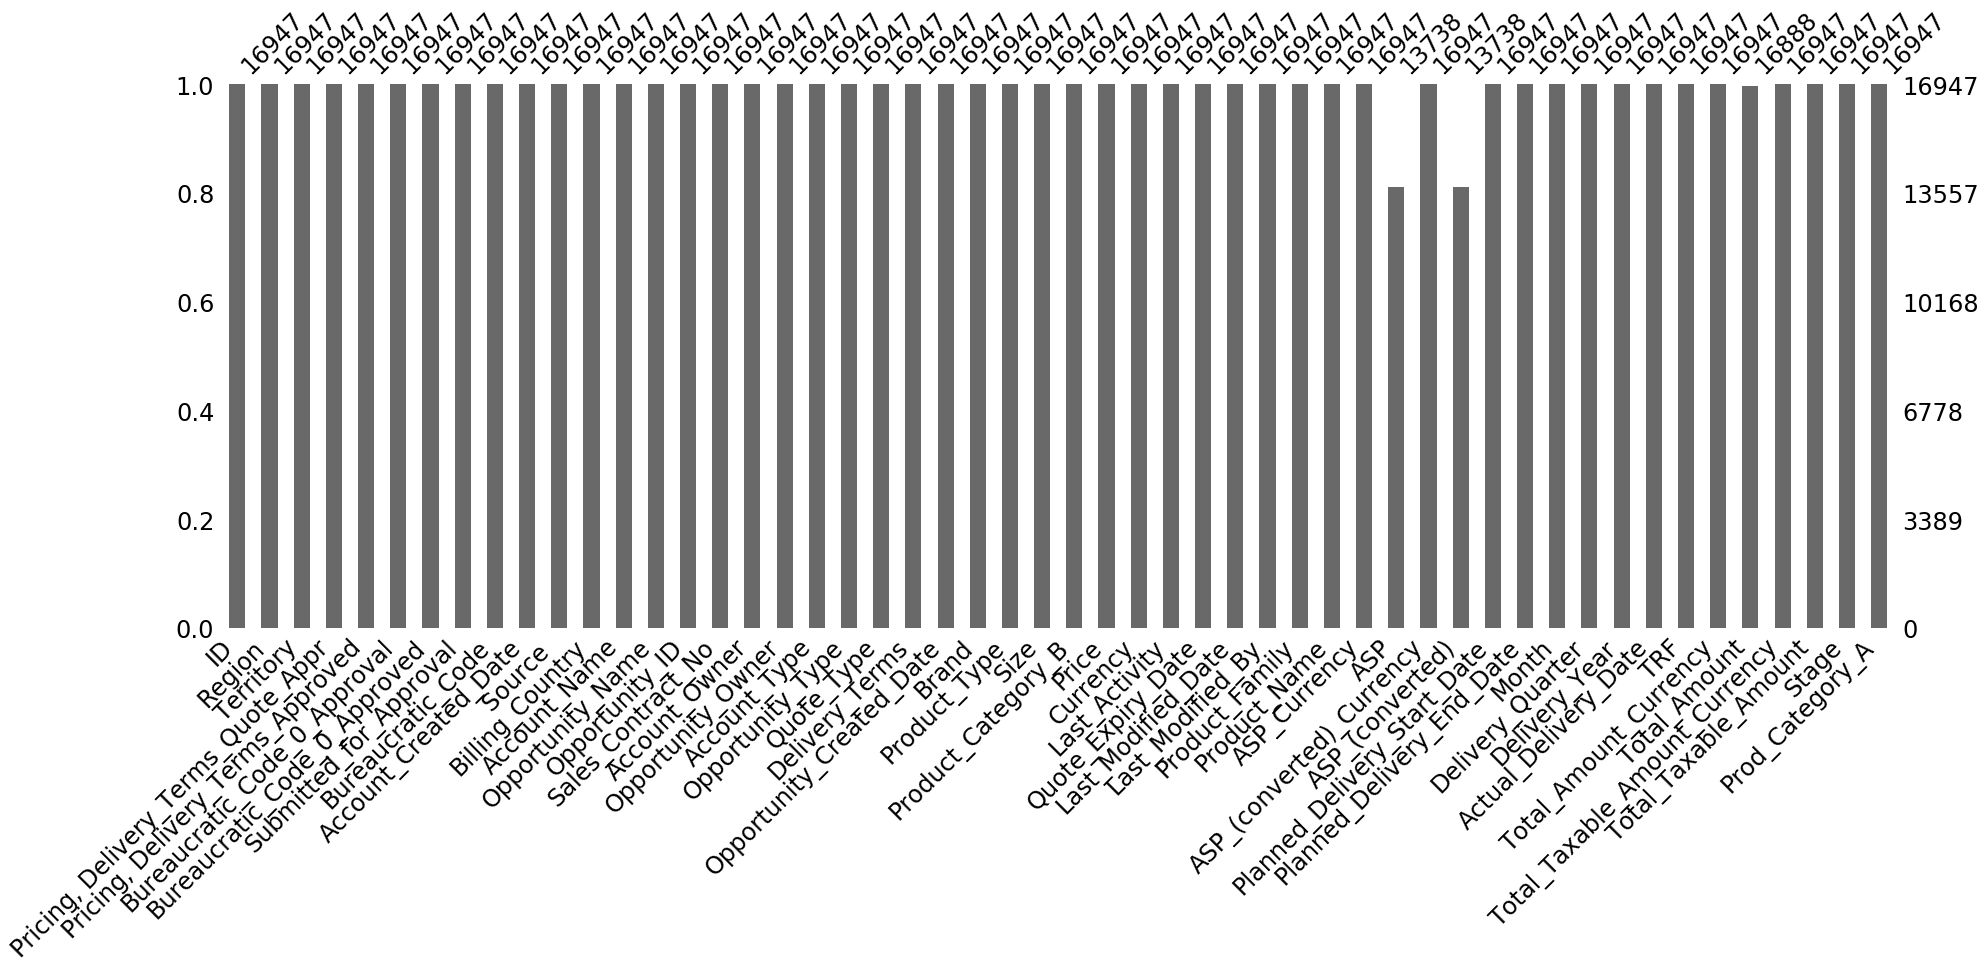

In [23]:
msno.bar(df_train, figsize = (30,10), labels=True, fontsize=24)

In [24]:
df_train.columns[df_train.isnull().any()].tolist()

['ASP', 'ASP_(converted)', 'Total_Amount']

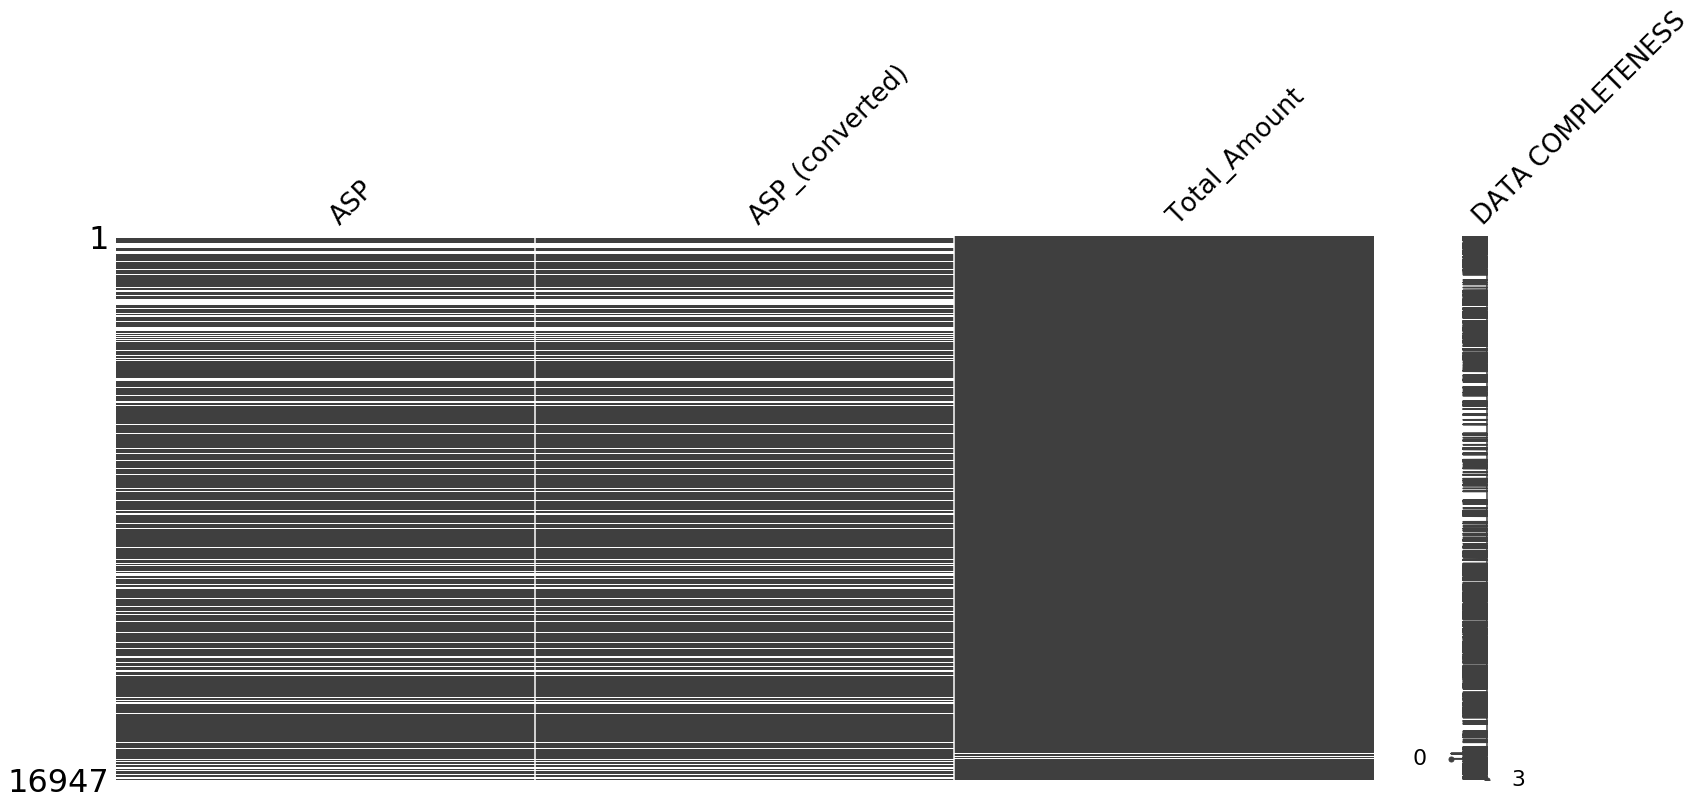

In [25]:
missingdata_df = df_train.columns[df_train.isnull().any()].tolist()
msno.matrix(df_train[missingdata_df], labels=True, fontsize=26)

In [26]:
df_train.dropna(inplace=True)

In [27]:
print(len(df_train))

13684


No se observan campos vacios en el set de datos, sin embargo veremos campos del estilo None en Territory o Nat Actual_Delivery_Date

In [28]:
pd.isna(df_train.Actual_Delivery_Date).value_counts()

False    13684
Name: Actual_Delivery_Date, dtype: int64

# Matriz de correlacion

In [29]:
cor = df_train[['ID', 'Pricing, Delivery_Terms_Quote_Appr',
         'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
         'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Opportunity_ID', 'ASP', 'ASP_(converted)', 'Delivery_Year', 'TRF',
       'Total_Amount', 'Total_Taxable_Amount'
         ]].corr().abs()

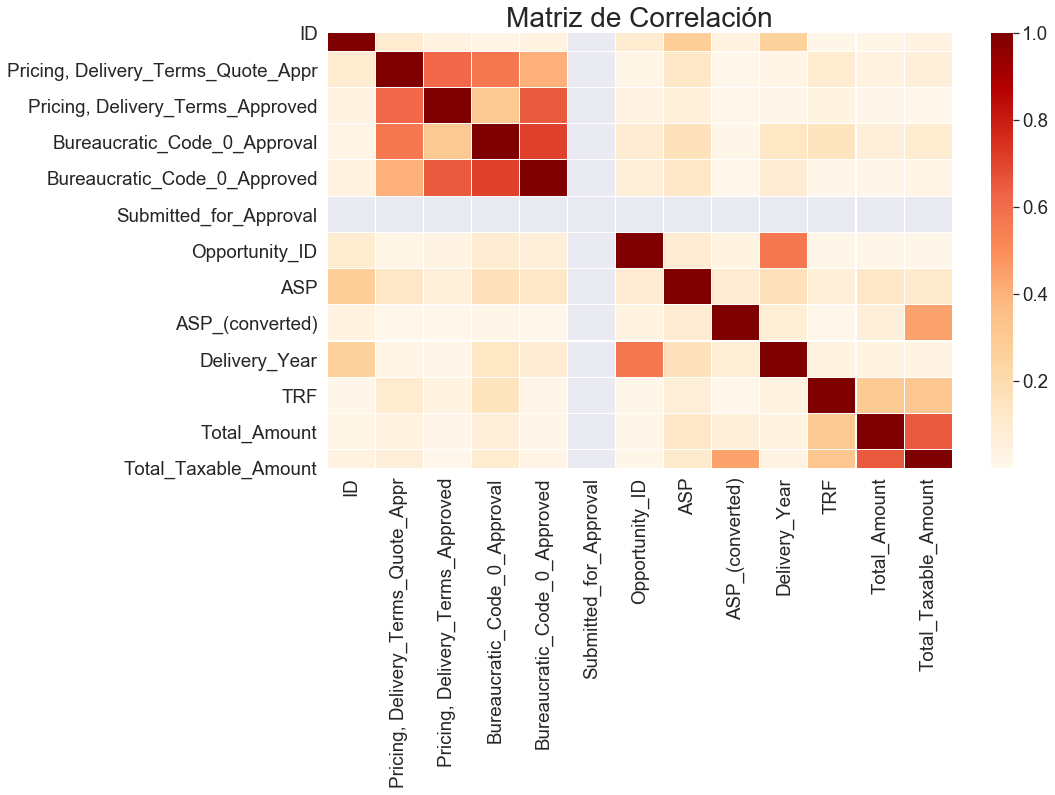

In [30]:
sns.set(font_scale=1.7)

fig, ax = plt.subplots(figsize=(14,8))        

sns.heatmap(cor,annot=False,linewidth = 0.05, cmap='OrRd' );
plt.title('Matriz de Correlación', fontsize=28);


# Analisis de Regiones y Territorios

## Regiones

In [31]:
df_train.Region.unique()

array(['EMEA', 'Americas', 'Japan', 'APAC', 'Middle East'], dtype=object)

In [32]:
grouped_Region = df_train['Region'].value_counts().to_frame()
grouped_Region = grouped_Region.rename(columns={"Region": "total"})

grouped_Region

total
EMEA          4656
Americas      3466
APAC          3235
Japan         2143
Middle East    184

In [33]:
grouped_Region.reset_index()

index  total
0         EMEA   4656
1     Americas   3466
2         APAC   3235
3        Japan   2143
4  Middle East    184

In [34]:
grouped_Region_top5 = grouped_Region['total'].nlargest(5)
grouped_Region_top5

EMEA           4656
Americas       3466
APAC           3235
Japan          2143
Middle East     184
Name: total, dtype: int64

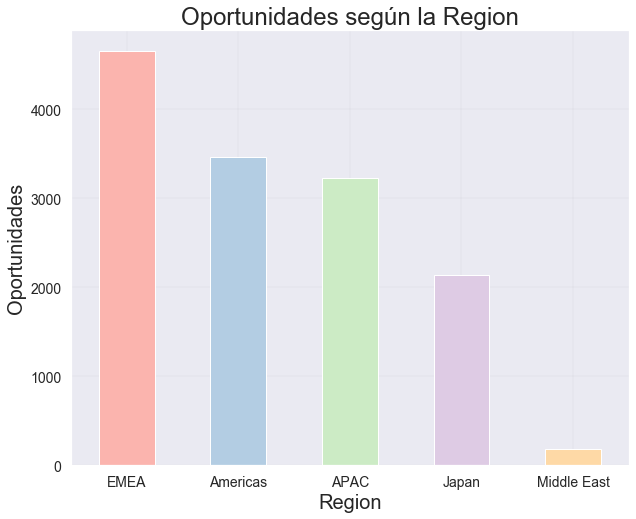

In [35]:

paired_colors = plt.cm.Pastel1(range(len(grouped_Region_top5)))
grouped_Region_top5.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14, label='index')
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.3)
plt.title('Oportunidades según la Region', fontsize=24);
plt.xlabel('Region', fontsize=20);

plt.ylabel('Oportunidades', fontsize=20);

## Territorios

In [36]:
df_train.Territory.unique()

array(['None', 'NW America', 'India', 'Italy', 'Germany',
       'United Kingdom', 'UAE (Dubai)', 'Greece', 'Switzerland',
       'Austria', 'NE America', 'Belgium', 'Japan', 'Tunisia',
       'SE America', 'France', 'Spain', 'Singapore', 'Philippines',
       'SW America', 'Denmark', 'Central America', 'Poland', 'Norway',
       'Thailand', 'Portugal', 'South Korea', 'Australia', 'Netherlands',
       'Kuwait', 'Cambodia', 'Indonesia', 'China (PRC)', 'KSA', 'Ireland',
       'Jordan', 'Cyprus', 'Morocco', 'Turkey', 'Sweden', 'Monaco',
       'Kazakhstan', 'Romania', 'Hungary', 'Taiwan', 'South America',
       'South East Asia', 'Macedonia', 'Ukraine', 'Czech Republic',
       'Belarus', 'Solomon Islands', 'Vietnam', 'Saudi Arabia',
       'Bosnia & Herzegovina', 'Kosovo', 'Luxembourg', 'Bulgaria',
       'UAE (Others)', 'Armenia', 'Croatia', 'Malaysia', 'Georgia',
       'Estonia', 'Pakistan', 'Canada', 'Central US', 'Carribean',
       'Malta', 'New Zealand', 'Albania', 'Oman', 'Bur

In [37]:
#df_train['Territory_unified'] = df_train.Territory
df_train.loc[:,'Territory_unified'] = df_train['Territory']

### Unificacion de "SE America", "SW America", "NE America", "NW America","Central US" como United States

In [38]:
df_train['Territory_unified'].replace(to_replace =["SE America", "SW America", "NE America", "NW America","Central US"],  
                            value ="United States",inplace=True)

### Japon como territorio independiente

Japon se encuentra como Region independiente, de ese analisis se puede deducir que los casos donde Territory sea None y su region Japon se puede completar para ese territorio

In [39]:
df_train[(df_train.Territory_unified=='None' )&(df_train.Region=='Japan')]['Territory_unified']\
            .replace(to_replace ="None",value ="Japan",inplace=True)


/home/cesar/anaconda3/envs/venvp35/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [40]:
df_train.loc[(df_train.Territory_unified=='None' )&(df_train.Region=='Japan'),'Territory_unified'] = 'Japan'

### Cantidad de Oportunidades por Territorio

In [41]:
grouped_Territory = df_train['Territory_unified'].value_counts().reset_index()
grouped_Territory = grouped_Territory.rename(columns={"Territory_unified": "total","index":"Territory_unified"})



In [42]:
grouped_Territory[grouped_Territory['Territory_unified'].str.match('Central US')]

Empty DataFrame
Columns: [Territory_unified, total]
Index: []

In [43]:
#sum_United_States = grouped_Territory[ grouped_Territory['Territory'].str.match('Central US') | grouped_Territory['Territory'].str.match('SW America') | grouped_Territory['Territory'].str.match('SE America') | grouped_Territory['Territory'].str.match('NW America') | grouped_Territory['Territory'].str.match('NE America') ]['total'].sum()
#sum_United_States
#row_US = {'Territory':'America', 'total':sum_United_States}
##append row to the dataframe
#grouped_Territory = grouped_Territory.append(row_US,ignore_index=True)


In [44]:
grouped_Territory.set_index('Territory_unified',inplace=True)

In [45]:
grouped_Territory

total
Territory_unified          
United States          2903
Japan                  2143
Germany                1682
Australia              1207
India                   809
None                    689
Netherlands             533
France                  447
Singapore               441
United Kingdom          313
Belgium                 285
Italy                   283
Spain                   268
China (PRC)             218
Thailand                170
Austria                 145
Indonesia               145
Jordan                  102
Philippines              95
Canada                   71
Luxembourg               70
Portugal                 65
Poland                   60
Vietnam                  51
Cyprus                   44
Denmark                  38
New Zealand              38
Taiwan                   33
UAE (Dubai)              31
Turkey                   29
...                     ...
Kazakhstan                7
Pakistan                  6
Malta                     6
Macedonia                 6
Saudi Arabia              6
Bulgaria                  5
Tunisia                   5
Malaysia                  5
Ukraine                   5
Oman                      4
Belarus                   4
Bosnia & Herzegovina      4
Cambodia                  4
Kuwait                    3
Morocco                   3
Kosovo                    2
Romania                   2
UAE (Others)              2
Albania                   2
Armenia                   2
Lebanon                   2
South East Asia           2
Monaco                    1
Croatia                   1
Egypt                     1
Czech Republic            1
Solomon Islands           1
Burma                     1
Georgia                   1
Slovenia                  1

[72 rows x 1 columns]

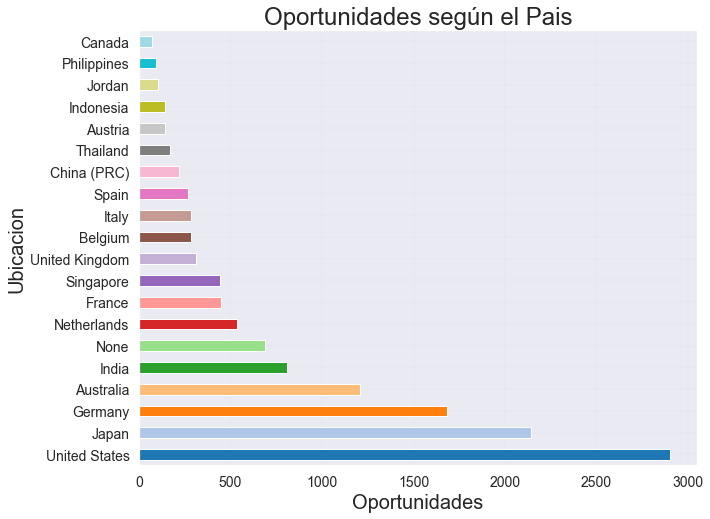

In [46]:
grouped_Territory_top20 = grouped_Territory['total'].nlargest(20)

paired_colors = plt.cm.tab20(range(len(grouped_Territory_top20)))

grouped_Territory_top20.sort_values(ascending=False).plot(kind='barh', rot=0, figsize=(10,8), color=paired_colors, fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.1, alpha=0.3)
plt.title('Oportunidades según el Pais', fontsize=24);
plt.xlabel('Oportunidades', fontsize=20);

plt.ylabel('Ubicacion', fontsize=20);

Se produzco una disminución de los casos None debido a la corrección en la Region de Japon

## Analisis de los None dentro de las Regiones y Territorios

Observando el grafico de Region y de Territorios se observo una alta tasa de territorio sin definir. Al comparar los graficos se observo que Japon se encuentra como Region individual por lo que no coincidia con su ranking de las oportunidades. 

In [47]:


grouped_Region_Terrotory = df_train.groupby(['Region','Territory_unified'])['Region'].count()
grouped_Region_Terrotory = grouped_Region_Terrotory.rename(columns={"Region": "total"})
grouped_Region_Terrotory = grouped_Region_Terrotory.reset_index()
grouped_Region_Terrotory = grouped_Region_Terrotory.rename(columns={0: "total"})
grouped_Region_Terrotory

Region     Territory_unified  total
0          APAC             Australia   1207
1          APAC                 Burma      1
2          APAC              Cambodia      4
3          APAC           China (PRC)    218
4          APAC                 India    809
5          APAC             Indonesia    145
6          APAC              Malaysia      5
7          APAC           New Zealand     38
8          APAC           Philippines     95
9          APAC             Singapore    441
10         APAC       Solomon Islands      1
11         APAC       South East Asia      2
12         APAC           South Korea     15
13         APAC                Taiwan     33
14         APAC              Thailand    170
15         APAC               Vietnam     51
16     Americas                Canada     71
17     Americas             Carribean     29
18     Americas                  None    474
19     Americas         United States   2892
20         EMEA               Albania      2
21         EMEA               Armenia      2
22         EMEA               Austria    145
23         EMEA               Belarus      4
24         EMEA               Belgium    285
25         EMEA  Bosnia & Herzegovina      4
26         EMEA              Bulgaria      5
27         EMEA       Central America      8
28         EMEA               Croatia      1
29         EMEA                Cyprus     44
..          ...                   ...    ...
48         EMEA                Monaco      1
49         EMEA               Morocco      3
50         EMEA           Netherlands    533
51         EMEA                  None    185
52         EMEA                Norway     20
53         EMEA                Poland     60
54         EMEA              Portugal     65
55         EMEA               Romania      2
56         EMEA              Slovenia      1
57         EMEA         South America      9
58         EMEA                 Spain    268
59         EMEA                Sweden     12
60         EMEA           Switzerland     21
61         EMEA               Tunisia      5
62         EMEA                Turkey     29
63         EMEA           UAE (Dubai)     12
64         EMEA               Ukraine      5
65         EMEA        United Kingdom    313
66         EMEA         United States     11
67        Japan                 Japan   2143
68  Middle East                Jordan    101
69  Middle East                   KSA     11
70  Middle East                Kuwait      3
71  Middle East               Lebanon      2
72  Middle East                  None     30
73  Middle East                  Oman      4
74  Middle East              Pakistan      6
75  Middle East          Saudi Arabia      6
76  Middle East           UAE (Dubai)     19
77  Middle East          UAE (Others)      2

[78 rows x 3 columns]

In [48]:
grouped_Region_Terrotory[grouped_Region_Terrotory.Territory_unified=='None']
grouped_Region_Terrotory[grouped_Region_Terrotory.Territory_unified=='None']

Region Territory_unified  total
18     Americas              None    474
51         EMEA              None    185
72  Middle East              None     30

In [49]:
grouped_Region_Terrotory[grouped_Region_Terrotory.Territory_unified=='United States']

Region Territory_unified  total
19  Americas     United States   2892
66      EMEA     United States     11

In [50]:
df_train[(df_train.Territory_unified=='United States') & (df_train.Region=='EMEA') ]

ID Region   Territory  Pricing, Delivery_Terms_Quote_Appr  \
773    28062   EMEA  SE America                                   1   
774    28063   EMEA  SE America                                   1   
3659    8043   EMEA  SE America                                   1   
3660    8048   EMEA  SE America                                   1   
3661    8056   EMEA  SE America                                   1   
3662    8061   EMEA  SE America                                   1   
3663    8067   EMEA  SE America                                   1   
3667    8037   EMEA  SE America                                   1   
6114   16214   EMEA  SE America                                   1   
16636  18241   EMEA  SE America                                   1   
16818  28750   EMEA  SW America                                   1   

       Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
773                                   1                             1   
774                                   1                             1   
3659                                  0                             1   
3660                                  0                             1   
3661                                  0                             1   
3662                                  0                             1   
3663                                  0                             1   
3667                                  0                             1   
6114                                  1                             0   
16636                                 1                             1   
16818                                 1                             1   

       Bureaucratic_Code_0_Approved  Submitted_for_Approval  \
773                               1                       0   
774                               1                       0   
3659                              0                       0   
3660                              0                       0   
3661                              0                       0   
3662                              0                       0   
3663                              0                       0   
3667                              0                       0   
6114                              0                       0   
16636                             1                       0   
16818                             1                       0   

         Bureaucratic_Code Account_Created_Date  ... Delivery_Year  \
773    Bureaucratic_Code_4             7/2/2015  ...          2017   
774    Bureaucratic_Code_4             7/2/2015  ...          2017   
3659   Bureaucratic_Code_5            7/12/2016  ...          2017   
3660   Bureaucratic_Code_5            7/12/2016  ...          2017   
3661   Bureaucratic_Code_5            7/12/2016  ...          2017   
3662   Bureaucratic_Code_5            7/12/2016  ...          2017   
3663   Bureaucratic_Code_5            7/12/2016  ...          2017   
3667   Bureaucratic_Code_5            7/12/2016  ...          2017   
6114   Bureaucratic_Code_4            7/27/2013  ...          2017   
16636  Bureaucratic_Code_4            12/6/2013  ...          2016   
16818  Bureaucratic_Code_4           11/17/2015  ...          2017   

      Actual_Delivery_Date  TRF Total_Amount_Currency  Total_Amount  \
773                    NaT   25                   USD     9466875.0   
774                    NaT   35                   USD    13038750.0   
3659                   NaT   30                   USD    12012000.0   
3660                   NaT   30                   USD    12012000.0   
3661                   NaT   30                   USD    12012000.0   
3662                   NaT   30                   USD    12012000.0   
3663                   NaT   30                   USD    12012000.0   
3667                   NaT  400                   USD   153978825.0   
6114                   NaT    1            

Como se menciono más arriba el caso de Japon se puede determinar que ese territorio para los otros casos no se puede determinar su Territorio

In [51]:
df_train[(df_train.Territory_unified=='None') & (df_train.Region == 'Americas')]

ID    Region Territory  Pricing, Delivery_Terms_Quote_Appr  \
409    17313  Americas      None                                   1   
461     8925  Americas      None                                   0   
577    23006  Americas      None                                   0   
578    17170  Americas      None                                   1   
597    17042  Americas      None                                   0   
607    17892  Americas      None                                   0   
634    21829  Americas      None                                   0   
661    27486  Americas      None                                   0   
662    27488  Americas      None                                   0   
663    17033  Americas      None                                   0   
688    23484  Americas      None                                   1   
727    20506  Americas      None                                   1   
927    11332  Americas      None                                   0   
940    17879  Americas      None                                   1   
1033   20649  Americas      None                                   0   
1056   16983  Americas      None                                   0   
1133    5300  Americas      None                                   0   
1176   17608  Americas      None                                   1   
1190   14660  Americas      None                                   0   
1219   20485  Americas      None                                   1   
1220   20489  Americas      None                                   1   
1223    7842  Americas      None                                   1   
1228    5249  Americas      None                                   1   
1229    5255  Americas      None                                   1   
1230    5260  Americas      None                                   1   
1231    5266  Americas      None                                   1   
1265   16569  Americas      None                                   1   
1304   19814  Americas      None                                   1   
1552   27540  Americas      None                                   1   
1553   27548  Americas      None                                   1   
...      ...       ...       ...                                 ...   
16109  20516  Americas      None                                   1   
16339  19279  Americas      None                                   1   
16340  19282  Americas      None                                   1   
16341  19285  Americas      None                                   1   
16342  19289  Americas      None                                   1   
16343  19292  Americas      None                                   1   
16344  19295  Americas      None                                   1   
16345  19298  Americas      None                                   1   
16346  19302  Americas      None                                   1   
16347  19305  Americas      None                                   1   
16407  23985  Americas      None                                   1   
16408  23984  Americas      None                                   1   
16409  23987  Americas      None                                   1   
16411  19668  Americas      None                                   1   
16412  19671  Americas      None                                   1   
16413  19684  Americas      None                                   1   
16430  23354  Americas      None                                   1   
16431  23350  Americas      None                                   1   
16432  23363  Americas      None                                   1   
16603  19674  Americas      None                                   1   
16604  19678  Americas      None                                   1   
16605  19681  Americas      None                                   1   
16802  21757  Americas      None                                   1   
16803  21760  Americas      None                  

#Japon se observa como Region independiente por lo tanto se puede reemplazar los valorse none

Tenemos una gran cantidad de propuestas donde el data se no detalla el origen de la propuesta.

ModuleNotFoundError: No module named 'cairosvg'

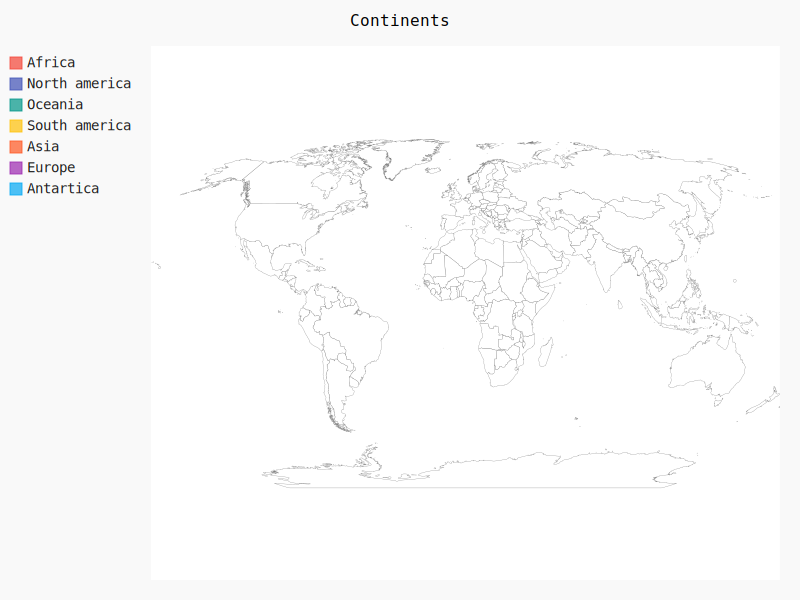

In [52]:
import pygal as pg
  
# create a world map 
#worldmap =  pg.maps.World.SupranationalWorld() 
worldmap = pg.maps.world.World()
# set the title of map 
worldmap.title = 'Continents'
  
# adding the continents 
worldmap.add('Africa', [('africa')]) 
worldmap.add('North america', [('north_america')]) 
worldmap.add('Oceania', [('oceania')]) 
worldmap.add('South america', [('south_america')]) 
worldmap.add('Asia', [('asia')]) 
worldmap.add('Europe', [('europe')]) 
worldmap.add('Antartica', [('antartica')]) 
  


In [53]:
#!pip install pygal
#!pip install pygal_maps_world


In [54]:
# Plot population estimates with an accurate legend

#fig, ax = plt.subplots(1, 1)

#world.plot(column='pop_est',
#            ax=ax,
#            legend=True,
#            legend_kwds={'label': "Population by Country",'orientation': "horizontal"})

## Correccion de Nombres de Territorios

Para poder graficar los territorio primero haremos unas revisión de los nombres.
Utilizaresmos geonameschema y compararemos los nombres y buscaremos cuales no aparecen en la api.

In [55]:
#!pip install geonamescache

In [56]:
from geonamescache import GeonamesCache

countries = GeonamesCache().get_countries_by_names()
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['Bosnia & Herzegovina',
 'Burma',
 'Carribean',
 'Central America',
 'China (PRC)',
 'Czech Republic',
 'KSA',
 'Macedonia',
 'None',
 'South America',
 'South East Asia',
 'UAE (Dubai)',
 'UAE (Others)']

In [57]:
countries.keys()

dict_keys(['Andorra', 'United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia', 'Angola', 'Antarctica', 'Argentina', 'American Samoa', 'Austria', 'Australia', 'Aruba', 'Aland Islands', 'Azerbaijan', 'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium', 'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin', 'Saint Barthelemy', 'Bermuda', 'Brunei', 'Bolivia', 'Bonaire, Saint Eustatius and Saba ', 'Brazil', 'Bahamas', 'Bhutan', 'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada', 'Cocos Islands', 'Democratic Republic of the Congo', 'Central African Republic', 'Republic of the Congo', 'Switzerland', 'Ivory Coast', 'Cook Islands', 'Chile', 'Cameroon', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Cabo Verde', 'Curacao', 'Christmas Island', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Denmark', 'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia', 'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethiopia', 'Finland', 'Fiji',

In [58]:
(list(countries)=='Cuba')

False

In [59]:
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['Bosnia & Herzegovina',
 'Burma',
 'Carribean',
 'Central America',
 'China (PRC)',
 'Czech Republic',
 'KSA',
 'Macedonia',
 'None',
 'South America',
 'South East Asia',
 'UAE (Dubai)',
 'UAE (Others)']

### Creacion de la columna Region_unified

generamos una nueva columna

In [60]:
df_train.loc[:,'Region_unified'] = df_train.loc[:,'Region'] 

### Reemplazo de Burma por Myanmar y South East Asia

In [61]:
df_train[(df_train.Territory_unified.str.contains('Burma')) ].Region.unique() #& (df_train.Region == 'Americas')

array(['APAC'], dtype=object)

In [62]:
#Reemplazo a Burma y South East Asia (si bien es un territorio muy grande son solo 2 registros y Myanmar pertenece a el)
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Burma', 'Myanmar')
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('South East Asia', 'Myanmar')



### Correccion en Bosnia & Herzagovina por Bosnia and Herzegovina

In [63]:

df_train[(df_train.Territory_unified.str.contains('Bosnia & Herzegovina')) ]

ID Region             Territory  Pricing, Delivery_Terms_Quote_Appr  \
4794  13905   EMEA  Bosnia & Herzegovina                                   1   
4813  10908   EMEA  Bosnia & Herzegovina                                   1   
4814  10914   EMEA  Bosnia & Herzegovina                                   1   
4815  10919   EMEA  Bosnia & Herzegovina                                   1   

      Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
4794                                 1                             0   
4813                                 1                             0   
4814                                 1                             0   
4815                                 1                             0   

      Bureaucratic_Code_0_Approved  Submitted_for_Approval  \
4794                             0                       0   
4813                             0                       0   
4814                             0                       0   
4815                             0                       0   

        Bureaucratic_Code Account_Created_Date  ... Actual_Delivery_Date TRF  \
4794  Bureaucratic_Code_4           10/21/2016  ...                  NaT   0   
4813  Bureaucratic_Code_4            2/25/2016  ...                  NaT   0   
4814  Bureaucratic_Code_4            2/25/2016  ...                  NaT   0   
4815  Bureaucratic_Code_4            2/25/2016  ...                  NaT   0   

     Total_Amount_Currency Total_Amount  Total_Taxable_Amount_Currency  \
4794                   EUR     81487.50                            EUR   
4813                   EUR     64759.38                            EUR   
4814                   EUR     64759.38                            EUR   
4815                   EUR     64759.38                            EUR   

     Total_Taxable_Amount        Stage       Prod_Category_A  \
4794             81487.50  Closed Lost  Prod_Category_A_None   
4813            194278.14  Closed Lost  Prod_Category_A_None   
4814            194278.14  Closed Lost  Prod_Category_A_None   
4815            194278.14  Closed Lost  Prod_Category_A_None   

         Territory_unified Region_unified  
4794  Bosnia & Herzegovina           EMEA  
4813  Bosnia & Herzegovina           EMEA  
4814  Bosnia & Herzegovina           EMEA  
4815  Bosnia & Herzegovina           EMEA  

[4 rows x 54 columns]

In [64]:
#Reemplazo

df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Bosnia & Herzegovina', 'Bosnia and Herzegovina')


### Reemplazo de China PRC por China

In [65]:
df_train[(df_train.Territory_unified.str.contains('China')) ] 

ID Region    Territory  Pricing, Delivery_Terms_Quote_Appr  \
942     6678   APAC  China (PRC)                                   1   
1168    9703   APAC  China (PRC)                                   1   
1169    9708   APAC  China (PRC)                                   1   
1170    9714   APAC  China (PRC)                                   1   
1171    9719   APAC  China (PRC)                                   1   
1172    9726   APAC  China (PRC)                                   1   
1512   10258   APAC  China (PRC)                                   1   
1513   10263   APAC  China (PRC)                                   1   
1641    9916   APAC  China (PRC)                                   1   
1907    9193   APAC  China (PRC)                                   1   
2380   10247   APAC  China (PRC)                                   1   
2381   10252   APAC  China (PRC)                                   1   
2382   10304   APAC  China (PRC)                                   1   
2480    9731   APAC  China (PRC)                                   1   
2481    9737   APAC  China (PRC)                                   1   
2777   10136   APAC  China (PRC)                                   1   
2778   10141   APAC  China (PRC)                                   1   
2902    9953   APAC  China (PRC)                                   1   
2903    9959   APAC  China (PRC)                                   1   
2904    9964   APAC  China (PRC)                                   1   
3322    9930   APAC  China (PRC)                                   1   
3323    9936   APAC  China (PRC)                                   1   
3324    9941   APAC  China (PRC)                                   1   
3325    9948   APAC  China (PRC)                                   1   
3801    9381   APAC  China (PRC)                                   1   
3802    9386   APAC  China (PRC)                                   1   
3803    9393   APAC  China (PRC)                                   1   
3804    9398   APAC  China (PRC)                                   1   
3805    9404   APAC  China (PRC)                                   1   
3832    9293   APAC  China (PRC)                                   1   
...      ...    ...          ...                                 ...   
13153   9670   APAC  China (PRC)                                   1   
13647  14662   APAC  China (PRC)                                   1   
13791   9897   APAC  China (PRC)                                   1   
13792   9903   APAC  China (PRC)                                   1   
13793   9908   APAC  China (PRC)                                   1   
13794   9914   APAC  China (PRC)                                   1   
13795   9919   APAC  China (PRC)                                   1   
13796   9925   APAC  China (PRC)                                   1   
13844   9163   APAC  China (PRC)                                   1   
13845   9114   APAC  China (PRC)                                   1   
13846   9125   APAC  China (PRC)                                   1   
13847   9130   APAC  China (PRC)                                   1   
13848   9136   APAC  China (PRC)                                   1   
13849   9141   APAC  China (PRC)                                   1   
13850   9147   APAC  China (PRC)                                   1   
13851   9152   APAC  China (PRC)                                   1   
13870  15135   APAC  China (PRC)                                   1   
14119   9864   APAC  China (PRC)                                   1   
14120   9870   APAC  China (PRC)                                   1   
14121   9875   APAC  China (PRC)                                   1   
14122   9881   APAC  China (PRC)                                   1   
14123   9886   APAC  China (PRC)                                   1   
14124   9892   APAC  China (PRC)                                   1   
14747   9171   APAC  China (PRC)                  

In [66]:
# Reemplazo China PRC Por China
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('China (PRC)', 'China')


In [67]:
df_train[(df_train.Territory_unified.str.contains('United')) ].Region.unique()

array(['Americas', 'EMEA'], dtype=object)

### Reemplazo de Czech Republic por Czechia

In [68]:
df_train[(df_train.Territory_unified.str.contains('Czech Republic')) ] #& (df_train.Region == 'Americas')

ID Region       Territory  Pricing, Delivery_Terms_Quote_Appr  \
3768  8266   EMEA  Czech Republic                                   0   

      Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
3768                                 0                             0   

      Bureaucratic_Code_0_Approved  Submitted_for_Approval  \
3768                             0                       0   

        Bureaucratic_Code Account_Created_Date  ... Actual_Delivery_Date TRF  \
3768  Bureaucratic_Code_4            7/18/2016  ...                  NaT   0   

     Total_Amount_Currency Total_Amount  Total_Taxable_Amount_Currency  \
3768                   EUR     101400.0                            EUR   

     Total_Taxable_Amount        Stage       Prod_Category_A  \
3768             101400.0  Closed Lost  Prod_Category_A_None   

     Territory_unified Region_unified  
3768    Czech Republic           EMEA  

[1 rows x 54 columns]

In [69]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Czech Republic', 'Czechia')


### Reemplazo de KZA por Saudi Arabia

In [70]:
df_train[(df_train.Territory_unified.str.contains('KSA')) ]

ID       Region Territory  Pricing, Delivery_Terms_Quote_Appr  \
994    18723  Middle East       KSA                                   1   
995     6816  Middle East       KSA                                   1   
4754   23554  Middle East       KSA                                   1   
5196   15167  Middle East       KSA                                   1   
6097   11501  Middle East       KSA                                   1   
11477  12150  Middle East       KSA                                   1   
12879   4863  Middle East       KSA                                   1   
13475  16356  Middle East       KSA                                   1   
13609  16312  Middle East       KSA                                   1   
14347  16317  Middle East       KSA                                   1   
14348  16323  Middle East       KSA                                   1   
15192  16295         EMEA       KSA                                   1   
16029   4858         EMEA       KSA                                   1   

       Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
994                                   0                             1   
995                                   0                             1   
4754                                  1                             1   
5196                                  0                             1   
6097                                  1                             1   
11477                                 1                             1   
12879                                 1                             1   
13475                                 1                             1   
13609                                 1                             1   
14347                                 1                             1   
14348                                 1                             1   
15192                                 1                             1   
16029                                 1                             1   

       Bureaucratic_Code_0_Approved  Submitted_for_Approval  \
994                               0                       0   
995                               0                       0   
4754                              1                       0   
5196                              0                       0   
6097                              1                       0   
11477                             1                       0   
12879                             1                       0   
13475                             1                       0   
13609                             1                       0   
14347                             1                       0   
14348                             1                       0   
15192                             1                       0   
16029                             1                       0   

         Bureaucratic_Code Account_Created_Date  ... Actual_Delivery_Date  \
994    Bureaucratic_Code_5            7/28/2013  ...                  NaT   
995    Bureaucratic_Code_5            1/24/2017  ...                  NaT   
4754   Bureaucratic_Code_4           12/10/2014  ...                  NaT   
5196   Bureaucratic_Code_5           11/20/2016  ...                  NaT   
6097   Bureaucratic_Code_4            3/28/2017  ...                  NaT   
11477  Bureaucratic_Code_4           12/28/2017  ...                  NaT   
12879  Bureaucratic_Code_4            6/12/2017  ...                  NaT   
13475  Bureaucratic_Code_4            6/12/2017  ...                  NaT   
13609  Bureaucratic_Code_4            6/12/2017  ...                  NaT   
14347  Bureaucratic_Code_4            6/12/2017  ...                  NaT   
14348  Bureaucratic_Code_4            6/12/2017  ...                  NaT   
15192  Bureaucratic_Code_4            6/12/2017  ...                  NaT   
16029  Bureaucratic_Code_4            6/12/2017  ...

In [71]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('KSA', 'Saudi Arabia')


### Reemplazo de Macedonia por North Macedonia

In [72]:
df_train[(df_train.Territory_unified.str.contains('Macedonia')) ]

ID Region  Territory  Pricing, Delivery_Terms_Quote_Appr  \
3190   23704   EMEA  Macedonia                                   0   
12320  15908   EMEA  Macedonia                                   1   
12321  16391   EMEA  Macedonia                                   1   
16299  27972   EMEA  Macedonia                                   1   
16300  27973   EMEA  Macedonia                                   1   
16301  27974   EMEA  Macedonia                                   1   

       Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
3190                                  0                             0   
12320                                 1                             0   
12321                                 1                             0   
16299                                 0                             1   
16300                                 0                             1   
16301                                 0                             1   

       Bureaucratic_Code_0_Approved  Submitted_for_Approval  \
3190                              0                       0   
12320                             0                       0   
12321                             0                       0   
16299                             0                       0   
16300                             0                       0   
16301                             0                       0   

         Bureaucratic_Code Account_Created_Date  ... Actual_Delivery_Date TRF  \
3190   Bureaucratic_Code_4            1/21/2015  ...                  NaT   0   
12320  Bureaucratic_Code_4            7/27/2013  ...                  NaT   0   
12321  Bureaucratic_Code_4            7/27/2013  ...                  NaT   0   
16299  Bureaucratic_Code_5            6/22/2015  ...                  NaT   1   
16300  Bureaucratic_Code_5            6/22/2015  ...                  NaT   1   
16301  Bureaucratic_Code_5            6/22/2015  ...                  NaT   1   

      Total_Amount_Currency Total_Amount  Total_Taxable_Amount_Currency  \
3190                    EUR      32760.0                            EUR   
12320                   EUR       5655.0                            EUR   
12321                   EUR      97128.0                            EUR   
16299                   EUR     549450.0                            EUR   
16300                   EUR          0.0                            EUR   
16301                   EUR          0.0                            EUR   

      Total_Taxable_Amount        Stage       Prod_Category_A  \
3190               32760.0   Closed Won  Prod_Category_A_None   
12320             102783.0   Closed Won  Prod_Category_A_None   
12321             102783.0   Closed Won  Prod_Category_A_None   
16299             549450.0  Closed Lost  Prod_Category_A_None   
16300             549450.0  Closed Lost  Prod_Category_A_None   
16301             549450.0  Closed Lost  Prod_Category_A_None   

      Territory_unified Region_unified  
3190          Macedonia           EMEA  
12320         Macedonia           EMEA  
12321         Macedonia           EMEA  
16299         Macedonia           EMEA  
16300         Macedonia           EMEA  
16301         Macedonia           EMEA  

[6 rows x 54 columns]

In [73]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('Macedonia','North Macedonia')



In [74]:
df_train[(df_train.Territory_unified.str.contains('Macedonia')) ]

ID Region  Territory  Pricing, Delivery_Terms_Quote_Appr  \
3190   23704   EMEA  Macedonia                                   0   
12320  15908   EMEA  Macedonia                                   1   
12321  16391   EMEA  Macedonia                                   1   
16299  27972   EMEA  Macedonia                                   1   
16300  27973   EMEA  Macedonia                                   1   
16301  27974   EMEA  Macedonia                                   1   

       Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
3190                                  0                             0   
12320                                 1                             0   
12321                                 1                             0   
16299                                 0                             1   
16300                                 0                             1   
16301                                 0                             1   

       Bureaucratic_Code_0_Approved  Submitted_for_Approval  \
3190                              0                       0   
12320                             0                       0   
12321                             0                       0   
16299                             0                       0   
16300                             0                       0   
16301                             0                       0   

         Bureaucratic_Code Account_Created_Date  ... Actual_Delivery_Date TRF  \
3190   Bureaucratic_Code_4            1/21/2015  ...                  NaT   0   
12320  Bureaucratic_Code_4            7/27/2013  ...                  NaT   0   
12321  Bureaucratic_Code_4            7/27/2013  ...                  NaT   0   
16299  Bureaucratic_Code_5            6/22/2015  ...                  NaT   1   
16300  Bureaucratic_Code_5            6/22/2015  ...                  NaT   1   
16301  Bureaucratic_Code_5            6/22/2015  ...                  NaT   1   

      Total_Amount_Currency Total_Amount  Total_Taxable_Amount_Currency  \
3190                    EUR      32760.0                            EUR   
12320                   EUR       5655.0                            EUR   
12321                   EUR      97128.0                            EUR   
16299                   EUR     549450.0                            EUR   
16300                   EUR          0.0                            EUR   
16301                   EUR          0.0                            EUR   

      Total_Taxable_Amount        Stage       Prod_Category_A  \
3190               32760.0   Closed Won  Prod_Category_A_None   
12320             102783.0   Closed Won  Prod_Category_A_None   
12321             102783.0   Closed Won  Prod_Category_A_None   
16299             549450.0  Closed Lost  Prod_Category_A_None   
16300             549450.0  Closed Lost  Prod_Category_A_None   
16301             549450.0  Closed Lost  Prod_Category_A_None   

      Territory_unified Region_unified  
3190    North Macedonia           EMEA  
12320   North Macedonia           EMEA  
12321   North Macedonia           EMEA  
16299   North Macedonia           EMEA  
16300   North Macedonia           EMEA  
16301   North Macedonia           EMEA  

[6 rows x 54 columns]

### Reemplazo de UAE (Dubai) y UAE (Others)  por United Arab Emirates

In [75]:
df_train[(df_train.Territory_unified.str.contains('UAE')) ]

ID       Region     Territory  Pricing, Delivery_Terms_Quote_Appr  \
78      4904         EMEA   UAE (Dubai)                                   1   
399     8737         EMEA   UAE (Dubai)                                   1   
999     6839  Middle East   UAE (Dubai)                                   1   
1930   10608         EMEA   UAE (Dubai)                                   1   
1932   10597         EMEA   UAE (Dubai)                                   1   
1934    4898         EMEA   UAE (Dubai)                                   1   
2806    4909         EMEA   UAE (Dubai)                                   1   
2812   14831         EMEA   UAE (Dubai)                                   1   
2813   14815         EMEA   UAE (Dubai)                                   1   
2814   14804         EMEA   UAE (Dubai)                                   1   
2815   14826         EMEA   UAE (Dubai)                                   1   
2816   14809         EMEA   UAE (Dubai)                                   1   
2817   14820         EMEA   UAE (Dubai)                                   1   
4755   13811  Middle East   UAE (Dubai)                                   1   
4756   13816  Middle East   UAE (Dubai)                                   1   
5121   14822  Middle East   UAE (Dubai)                                   1   
5402   13628  Middle East  UAE (Others)                                   1   
5673    5101  Middle East   UAE (Dubai)                                   1   
6536   10605  Middle East   UAE (Dubai)                                   1   
6795   14816  Middle East   UAE (Dubai)                                   1   
7291   13657  Middle East   UAE (Dubai)                                   1   
7292   14811  Middle East   UAE (Dubai)                                   1   
8043   15851  Middle East   UAE (Dubai)                                   1   
8160   23791  Middle East   UAE (Dubai)                                   1   
8807    6834  Middle East   UAE (Dubai)                                   1   
8970    5307  Middle East   UAE (Dubai)                                   1   
9939    6827  Middle East   UAE (Dubai)                                   1   
10889   9534  Middle East   UAE (Dubai)                                   1   
14241  15958  Middle East  UAE (Others)                                   1   
15547   8780  Middle East   UAE (Dubai)                                   1   
15712   8785  Middle East   UAE (Dubai)                                   1   
15742   9286  Middle East   UAE (Dubai)                                   1   
15860  15952  Middle East   UAE (Dubai)                                   1   

       Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
78                                    0                             1   
399                                   1                             1   
999                                   1                             1   
1930                                  0                             1   
1932                                  1                             1   
1934                                  1                             1   
2806                                  0                             1   
2812                                  0                             1   
2813                                  0                             1   
2814                                  0                             1   
2815                                  0                             1   
2816                                  0                             1   
2817                                  0                             1   
4755                                  1                             1   
4756                                  1                             1   
5121                                  1                             1   
5402                                  1                             1   
5673     

In [76]:
#Reemplazo
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('UAE (Dubai)','United Arab Emirates')
df_train.loc[:,'Territory_unified'] = df_train['Territory_unified'].replace('UAE (Others)','United Arab Emirates')



In [77]:
df_train[(df_train.Territory_unified.str.contains('UAE')) ]

Empty DataFrame
Columns: [ID, Region, Territory, Pricing, Delivery_Terms_Quote_Appr, Pricing, Delivery_Terms_Approved, Bureaucratic_Code_0_Approval, Bureaucratic_Code_0_Approved, Submitted_for_Approval, Bureaucratic_Code, Account_Created_Date, Source , Billing_Country, Account_Name, Opportunity_Name, Opportunity_ID, Sales_Contract_No, Account_Owner, Opportunity_Owner, Account_Type, Opportunity_Type, Quote_Type, Delivery_Terms, Opportunity_Created_Date, Brand, Product_Type, Size, Product_Category_B, Price, Currency, Last_Activity, Quote_Expiry_Date, Last_Modified_Date, Last_Modified_By, Product_Family, Product_Name, ASP_Currency, ASP, ASP_(converted)_Currency, ASP_(converted), Planned_Delivery_Start_Date, Planned_Delivery_End_Date, Month, Delivery_Quarter, Delivery_Year, Actual_Delivery_Date, TRF, Total_Amount_Currency, Total_Amount, Total_Taxable_Amount_Currency, Total_Taxable_Amount, Stage, Prod_Category_A, Territory_unified, Region_unified]
Index: []

[0 rows x 54 columns]

### Reemplazo de South America por un pais

 Para graficar America del Sur distribuyo los paises asignados 
#Brazil Argentina Chile Uruguay Colombia Peru Venezuela Paraguay Ecuador

In [78]:
South_America = ["Brazil","Argentina","Chile", "Uruguay",'Colombia',"Peru", "Ecuador", "Venezuela", "Bolivia"]
j = 0
for index, row in df_train.iterrows(): 
    
    if row["Territory_unified"] == 'South America':  
        print (row["Territory_unified"], index, South_America[j])
        #df_train.iloc[index]["Territory_unified"] = South_America[j]       
        df_train.loc[index, 'Territory_unified'] = South_America[j]
        j=j+1

South America 2384 Brazil
South America 4700 Argentina
South America 4753 Chile
South America 5257 Uruguay
South America 6671 Colombia
South America 6672 Peru
South America 11754 Ecuador
South America 11755 Venezuela
South America 15895 Bolivia


In [79]:
df_train[df_train.Territory=='South America']


ID Region      Territory  Pricing, Delivery_Terms_Quote_Appr  \
2384   18235   EMEA  South America                                   1   
4700   13694   EMEA  South America                                   1   
4753   13805   EMEA  South America                                   1   
5257   11449   EMEA  South America                                   1   
6671   23990   EMEA  South America                                   1   
6672   23991   EMEA  South America                                   1   
11754  13718   EMEA  South America                                   1   
11755  13725   EMEA  South America                                   1   
15895  13046   EMEA  South America                                   1   

       Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
2384                                  0                             1   
4700                                  1                             1   
4753                                  1                             1   
5257                                  1                             1   
6671                                  1                             1   
6672                                  1                             1   
11754                                 1                             1   
11755                                 1                             1   
15895                                 1                             1   

       Bureaucratic_Code_0_Approved  Submitted_for_Approval  \
2384                              0                       0   
4700                              1                       0   
4753                              1                       0   
5257                              1                       0   
6671                              1                       0   
6672                              1                       0   
11754                             1                       0   
11755                             1                       0   
15895                             1                       0   

         Bureaucratic_Code Account_Created_Date  ... Actual_Delivery_Date TRF  \
2384   Bureaucratic_Code_5            12/6/2013  ...                  NaT   1   
4700   Bureaucratic_Code_4           10/15/2016  ...                  NaT   1   
4753   Bureaucratic_Code_4           10/18/2016  ...                  NaT   0   
5257   Bureaucratic_Code_4            9/23/2016  ...                  NaT   3   
6671   Bureaucratic_Code_4             4/7/2015  ...                  NaT  47   
6672   Bureaucratic_Code_4             4/7/2015  ...                  NaT  46   
11754  Bureaucratic_Code_4            3/29/2018  ...                  NaT   7   
11755  Bureaucratic_Code_4            3/29/2018  ...                  NaT  13   
15895  Bureaucratic_Code_4            2/19/2018  ...                  NaT  20   

      Total_Amount_Currency Total_Amount  Total_Taxable_Amount_Currency  \
2384                    USD    349440.00                            USD   
4700                    USD    459270.00                            USD   
4753                    USD     72800.00                            USD   
5257                    USD   1092000.00                            EUR   
6671                    EUR  17327100.00                            EUR   
6672                    EUR  17082761.25                            EUR   
11754                   EUR   2201355.00                            EUR   
11755                   EUR   4299750.00                            EUR   
15895                   USD   5309550.00                            USD   

      Total_Taxable_Amount        Stage       Prod_Category_A  \
2384             349440.00  Closed Lost  Prod_Category_A_None   
4700             459270.00  Closed Lost  Prod_Category_A_None   
4753              72800.00  Closed Lost  Prod_Category_A_None   
5257             965437.20  Closed Lost  Prod_Category_A_None   
6671           34409

In [80]:
#Controlo los resultados que modifique1235

df_train.loc[df_train.Territory.str.contains('South America'),['Region','Territory','Region_unified','Territory_unified']]

Region      Territory Region_unified Territory_unified
2384    EMEA  South America           EMEA            Brazil
4700    EMEA  South America           EMEA         Argentina
4753    EMEA  South America           EMEA             Chile
5257    EMEA  South America           EMEA           Uruguay
6671    EMEA  South America           EMEA          Colombia
6672    EMEA  South America           EMEA              Peru
11754   EMEA  South America           EMEA           Ecuador
11755   EMEA  South America           EMEA         Venezuela
15895   EMEA  South America           EMEA           Bolivia

In [81]:
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['Carribean', 'Central America', 'None']

### Reemplazo de Carribean por un pais

In [82]:
#https://en.wikipedia.org/wiki/Caribbean#Countries_and_territories

In [83]:
df_train.loc[df_train.Territory_unified=='Carribean',:].groupby('Territory')['Territory'].count()

Territory
Carribean    29
Name: Territory, dtype: int64

In [84]:
Carribean = ["Cuba","Trinidad and Tobago", "Haiti",'Jamaica',"Puerto Rico", "Dominican Republic", "Bahamas"]
j = 0
i= 0
for index, row in df_train.iterrows(): 
    
    if row["Territory_unified"] == 'Carribean':  
        print (row["Territory_unified"], index,j,len(Carribean), j%len(Carribean),Carribean[i])
        i=j%len(Carribean)
        df_train.loc[index, 'Territory_unified'] = Carribean[i]
        j=j+1

 

Carribean 7489 0 7 0 Cuba
Carribean 8992 1 7 1 Cuba
Carribean 9202 2 7 2 Trinidad and Tobago
Carribean 9455 3 7 3 Haiti
Carribean 9456 4 7 4 Jamaica
Carribean 9457 5 7 5 Puerto Rico
Carribean 9549 6 7 6 Dominican Republic
Carribean 9550 7 7 0 Bahamas
Carribean 9637 8 7 1 Cuba
Carribean 9934 9 7 2 Trinidad and Tobago
Carribean 10269 10 7 3 Haiti
Carribean 10481 11 7 4 Jamaica
Carribean 11109 12 7 5 Puerto Rico
Carribean 11774 13 7 6 Dominican Republic
Carribean 11775 14 7 0 Bahamas
Carribean 11776 15 7 1 Cuba
Carribean 11833 16 7 2 Trinidad and Tobago
Carribean 11864 17 7 3 Haiti
Carribean 11885 18 7 4 Jamaica
Carribean 11890 19 7 5 Puerto Rico
Carribean 12024 20 7 6 Dominican Republic
Carribean 12845 21 7 0 Bahamas
Carribean 12966 22 7 1 Cuba
Carribean 13328 23 7 2 Trinidad and Tobago
Carribean 13329 24 7 3 Haiti
Carribean 14414 25 7 4 Jamaica
Carribean 14662 26 7 5 Puerto Rico
Carribean 15498 27 7 6 Dominican Republic
Carribean 15802 28 7 0 Bahamas


In [85]:
#df_train.loc[df_train.Territory_unified=='Carribean',:]
df_train.loc[df_train.Territory.str.contains('Carribean'),['Region','Territory','Region_unified','Territory_unified']]

Region  Territory Region_unified    Territory_unified
7489   Americas  Carribean       Americas                 Cuba
8992   Americas  Carribean       Americas  Trinidad and Tobago
9202   Americas  Carribean       Americas                Haiti
9455   Americas  Carribean       Americas              Jamaica
9456   Americas  Carribean       Americas          Puerto Rico
9457   Americas  Carribean       Americas   Dominican Republic
9549   Americas  Carribean       Americas              Bahamas
9550   Americas  Carribean       Americas                 Cuba
9637   Americas  Carribean       Americas  Trinidad and Tobago
9934   Americas  Carribean       Americas                Haiti
10269  Americas  Carribean       Americas              Jamaica
10481  Americas  Carribean       Americas          Puerto Rico
11109  Americas  Carribean       Americas   Dominican Republic
11774  Americas  Carribean       Americas              Bahamas
11775  Americas  Carribean       Americas                 Cuba
11776  Americas  Carribean       Americas  Trinidad and Tobago
11833  Americas  Carribean       Americas                Haiti
11864  Americas  Carribean       Americas              Jamaica
11885  Americas  Carribean       Americas          Puerto Rico
11890  Americas  Carribean       Americas   Dominican Republic
12024  Americas  Carribean       Americas              Bahamas
12845  Americas  Carribean       Americas                 Cuba
12966  Americas  Carribean       Americas  Trinidad and Tobago
13328  Americas  Carribean       Americas                Haiti
13329  Americas  Carribean       Americas              Jamaica
14414  Americas  Carribean       Americas          Puerto Rico
14662  Americas  Carribean       Americas   Dominican Republic
15498  Americas  Carribean       Americas              Bahamas
15802  Americas  Carribean       Americas                 Cuba

In [86]:
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['Central America', 'None']

### Reemplazo de Central America por un pais

In [87]:
df_train.loc[df_train.Territory_unified=='Central America',:].groupby('Territory')['Territory'].count()

Territory
Central America    8
Name: Territory, dtype: int64

In [88]:
countries.keys()

dict_keys(['Andorra', 'United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia', 'Angola', 'Antarctica', 'Argentina', 'American Samoa', 'Austria', 'Australia', 'Aruba', 'Aland Islands', 'Azerbaijan', 'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium', 'Burkina Faso', 'Bulgaria', 'Bahrain', 'Burundi', 'Benin', 'Saint Barthelemy', 'Bermuda', 'Brunei', 'Bolivia', 'Bonaire, Saint Eustatius and Saba ', 'Brazil', 'Bahamas', 'Bhutan', 'Bouvet Island', 'Botswana', 'Belarus', 'Belize', 'Canada', 'Cocos Islands', 'Democratic Republic of the Congo', 'Central African Republic', 'Republic of the Congo', 'Switzerland', 'Ivory Coast', 'Cook Islands', 'Chile', 'Cameroon', 'China', 'Colombia', 'Costa Rica', 'Cuba', 'Cabo Verde', 'Curacao', 'Christmas Island', 'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Denmark', 'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Estonia', 'Egypt', 'Western Sahara', 'Eritrea', 'Spain', 'Ethiopia', 'Finland', 'Fiji',

In [89]:
#Mexico no se lo asume como de Centro America.
CentralAmerica = ["Belize","Costa Rica","El Salvador", "Guatemala",'Honduras', "Nicaragua", "Panama"]
j = 0

for index, row in df_train.iterrows(): 
    
    if row["Territory_unified"] == 'Central America':  
        print (row["Territory_unified"], index,j,len(CentralAmerica), j%len(CentralAmerica),CentralAmerica[i])
        i=j%len(CentralAmerica)
        df_train.loc[index, 'Territory_unified'] = CentralAmerica[i]
        j=j+1

Central America 407 0 7 0 Belize
Central America 1212 1 7 1 Belize
Central America 3843 2 7 2 Costa Rica
Central America 5071 3 7 3 El Salvador
Central America 16620 4 7 4 Guatemala
Central America 16659 5 7 5 Honduras
Central America 16732 6 7 6 Nicaragua
Central America 16733 7 7 0 Panama


In [90]:
#df_train['Territory_unified'].replace(to_replace ="Mexico",value ="Panama",inplace=True)

### Reemplazo de Territorio None por un pais

In [91]:
df_train.loc[df_train.Territory_unified.str.contains('None'),['Region','Territory','Region_unified','Territory_unified']]

Region Territory Region_unified Territory_unified
0          EMEA      None           EMEA              None
1          EMEA      None           EMEA              None
135        EMEA      None           EMEA              None
180        EMEA      None           EMEA              None
182        EMEA      None           EMEA              None
183        EMEA      None           EMEA              None
184        EMEA      None           EMEA              None
185        EMEA      None           EMEA              None
214        EMEA      None           EMEA              None
215        EMEA      None           EMEA              None
387        EMEA      None           EMEA              None
388        EMEA      None           EMEA              None
389        EMEA      None           EMEA              None
398        EMEA      None           EMEA              None
409    Americas      None       Americas              None
416        EMEA      None           EMEA              None
417        EMEA      None           EMEA              None
418        EMEA      None           EMEA              None
419        EMEA      None           EMEA              None
420        EMEA      None           EMEA              None
421        EMEA      None           EMEA              None
422        EMEA      None           EMEA              None
423        EMEA      None           EMEA              None
439        EMEA      None           EMEA              None
461    Americas      None       Americas              None
577    Americas      None       Americas              None
578    Americas      None       Americas              None
597    Americas      None       Americas              None
607    Americas      None       Americas              None
631        EMEA      None           EMEA              None
...         ...       ...            ...               ...
16430  Americas      None       Americas              None
16431  Americas      None       Americas              None
16432  Americas      None       Americas              None
16496      EMEA      None           EMEA              None
16603  Americas      None       Americas              None
16604  Americas      None       Americas              None
16605  Americas      None       Americas              None
16621      EMEA      None           EMEA              None
16626      EMEA      None           EMEA              None
16702      EMEA      None           EMEA              None
16703      EMEA      None           EMEA              None
16707      EMEA      None           EMEA              None
16712      EMEA      None           EMEA              None
16713      EMEA      None           EMEA              None
16793      EMEA      None           EMEA              None
16800      EMEA      None           EMEA              None
16802  Americas      None       Americas              None
16803  Americas      None       Americas              None
16804  Americas      None       Americas              None
16805  Americas      None       Americas              None
16814  Americas      None       Americas              None
16815  Americas      None       Americas              None
16816  Americas      None       Americas              None
16817  Americas      None       Americas              None
16826      EMEA      None           EMEA              None
16840      EMEA      None           EMEA              None
16844      EMEA      None           EMEA              None
16852      EMEA      None           EMEA              None
16853      EMEA      None           EMEA              None
16927      EMEA      None           EMEA              None

[689 rows x 4 columns]

### Control Final

Vuelvo a ejecutar el control para ver cuales son las diferencias

In [92]:
sorted(set(df_train.Territory_unified.unique()) - set(countries.keys()))

['None']

In [93]:
row=[]
for col1 in df_train.columns:
        row.append(valoresNulos1(df_train[col1]))

In [94]:
row

[('ID', 13684, 0, 0.0),
 ('Region', 13684, 0, 0.0),
 ('Territory', 13684, 0, 0.0),
 ('Pricing, Delivery_Terms_Quote_Appr', 13684, 0, 0.0),
 ('Pricing, Delivery_Terms_Approved', 13684, 0, 0.0),
 ('Bureaucratic_Code_0_Approval', 13684, 0, 0.0),
 ('Bureaucratic_Code_0_Approved', 13684, 0, 0.0),
 ('Submitted_for_Approval', 13684, 0, 0.0),
 ('Bureaucratic_Code', 13684, 0, 0.0),
 ('Account_Created_Date', 13684, 0, 0.0),
 ('Source ', 13684, 0, 0.0),
 ('Billing_Country', 13684, 0, 0.0),
 ('Account_Name', 13684, 0, 0.0),
 ('Opportunity_Name', 13684, 0, 0.0),
 ('Opportunity_ID', 13684, 0, 0.0),
 ('Sales_Contract_No', 13684, 0, 0.0),
 ('Account_Owner', 13684, 0, 0.0),
 ('Opportunity_Owner', 13684, 0, 0.0),
 ('Account_Type', 13684, 0, 0.0),
 ('Opportunity_Type', 13684, 0, 0.0),
 ('Quote_Type', 13684, 0, 0.0),
 ('Delivery_Terms', 13684, 0, 0.0),
 ('Opportunity_Created_Date', 13684, 0, 0.0),
 ('Brand', 13684, 0, 0.0),
 ('Product_Type', 13684, 0, 0.0),
 ('Size', 13684, 0, 0.0),
 ('Product_Category_B'

In [95]:
#United Arab Emirates

## Correccion en Regiones

Del primer analisis de territorios se observaron casos donde para un mismo Territorio estaba asignado a más de una región. Se buscarán si exiten más casos

In [96]:
grouped_Territory_Region = df_train.groupby(['Territory','Region'])['Region'].count().to_frame()
grouped_Territory_Region
grouped_Territory_Region = grouped_Territory_Region.rename(columns={"Region": "total"})
grouped_Territory_Region

total
Territory            Region            
Albania              EMEA             2
Armenia              EMEA             2
Australia            APAC          1207
Austria              EMEA           145
Belarus              EMEA             4
Belgium              EMEA           285
Bosnia & Herzegovina EMEA             4
Bulgaria             EMEA             5
Burma                APAC             1
Cambodia             APAC             4
Canada               Americas        71
Carribean            Americas        29
Central America      EMEA             8
Central US           Americas       180
China (PRC)          APAC           218
Croatia              EMEA             1
Cyprus               EMEA            44
Czech Republic       EMEA             1
Denmark              EMEA            38
Egypt                EMEA             1
Estonia              EMEA             8
France               EMEA           447
Georgia              EMEA             1
Germany              EMEA          1682
Greece               EMEA             9
Hungary              EMEA            28
India                APAC           809
Indonesia            APAC           145
Ireland              EMEA             9
Italy                EMEA           283
...                                 ...
Oman                 Middle East      4
Pakistan             Middle East      6
Philippines          APAC            95
Poland               EMEA            60
Portugal             EMEA            65
Romania              EMEA             2
SE America           Americas       423
                     EMEA            10
SW America           Americas       166
                     EMEA             1
Saudi Arabia         Middle East      6
Singapore            APAC           441
Slovenia             EMEA             1
Solomon Islands      APAC             1
South America        EMEA             9
South East Asia      APAC             2
South Korea          APAC            15
Spain                EMEA           268
Sweden               EMEA            12
Switzerland          EMEA            21
Taiwan               APAC            33
Thailand             APAC           170
Tunisia              EMEA             5
Turkey               EMEA            29
UAE (Dubai)          EMEA            12
                     Middle East     19
UAE (Others)         Middle East      2
Ukraine              EMEA             5
United Kingdom       EMEA           313
Vietnam              APAC            51

[84 rows x 1 columns]

### Cantidad de Regiones y Territorios

In [97]:
agrouped_Territory_Region_count = grouped_Territory_Region.groupby('Territory')['total'].count().to_frame()

In [98]:
agrouped_Territory_Region_count[agrouped_Territory_Region_count.total > 1]

total
Territory         
Jordan           2
KSA              2
None             4
SE America       2
SW America       2
UAE (Dubai)      2

estos son los casos que tienen 2 o mas regiones asignadas

### Correccion para KSA - Saudi Arabia

Para KSA surgieron 2 Regiones. Se debe corregir las regiones que sean de Saudi Arabia y Region EMEA. Pasara a ser Middle East

In [99]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('KSA')),'Region_unified'] = df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('KSA')),'Region_unified'].replace('EMEA', 'Middle East')

In [100]:
df_train

ID    Region       Territory  Pricing, Delivery_Terms_Quote_Appr  \
0      27761      EMEA            None                                   1   
1      27760      EMEA            None                                   0   
2      27446  Americas      NW America                                   0   
3      16808  Americas      NW America                                   1   
4      16805  Americas      NW America                                   1   
5      16802  Americas      NW America                                   1   
6      16799  Americas      NW America                                   1   
7      27455  Americas      NW America                                   1   
12     24358     Japan            None                                   1   
17     24425     Japan            None                                   1   
22     24370     Japan            None                                   1   
23     28524      APAC           India                                   1   
24      4915      APAC           India                                   1   
30     24391     Japan            None                                   1   
36     24364     Japan            None                                   1   
43     24404     Japan            None                                   1   
50     24383     Japan            None                                   1   
55     24396     Japan            None                                   1   
61     24411     Japan            None                                   1   
62     18557      EMEA           Italy                                   1   
63     13392      EMEA         Germany                                   0   
64     19342  Americas      NW America                                   0   
65     24444     Japan            None                                   1   
66     18491      EMEA  United Kingdom                                   0   
67     18494      EMEA  United Kingdom                                   0   
68      4920      EMEA  United Kingdom                                   1   
69     17590      EMEA         Germany                                   1   
70     19680      EMEA  United Kingdom                                   0   
71     19683      EMEA  United Kingdom                                   0   
72     19686      EMEA  United Kingdom                                   0   
...      ...       ...             ...                                 ...   
16913  23770     Japan            None                                   1   
16914  23781     Japan            None                                   1   
16919  21317     Japan            None                                   1   
16920  18513     Japan            None                                   1   
16921  18516     Japan            None                                   1   
16922  18519     Japan            None                                   1   
16923  27689     Japan            None                                   1   
16924  27688     Japan            None                                   1   
16925  19062     Japan           Japan                                   0   
16926  19066     Japan           Japan                                   1   
16927  23920      EMEA            None                                   0   
16928  19906      EMEA          France                                   0   
16929  12703      EMEA          France                                   1   
16930  28372  Americas      SE America                                   1   
16931  17804      EMEA  United Kingdom                                   1   
16932  15785      EMEA         Germany                                   0   
16933  15848      EMEA         Germany                                   0   
16934  15853      EMEA         Germany                                   0   
16935  17677      EMEA         Germany                                   0   
16936  17680      EMEA         G

In [101]:
df_train[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('KSA'))]

ID Region Territory  Pricing, Delivery_Terms_Quote_Appr  \
15192  16295   EMEA       KSA                                   1   
16029   4858   EMEA       KSA                                   1   

       Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
15192                                 1                             1   
16029                                 1                             1   

       Bureaucratic_Code_0_Approved  Submitted_for_Approval  \
15192                             1                       0   
16029                             1                       0   

         Bureaucratic_Code Account_Created_Date  ... Actual_Delivery_Date TRF  \
15192  Bureaucratic_Code_4            6/12/2017  ...                  NaT   0   
16029  Bureaucratic_Code_4            6/12/2017  ...                  NaT   0   

      Total_Amount_Currency Total_Amount  Total_Taxable_Amount_Currency  \
15192                   USD      57750.0                            USD   
16029                   USD      73689.0                            USD   

      Total_Taxable_Amount       Stage       Prod_Category_A  \
15192              57750.0  Closed Won  Prod_Category_A_None   
16029              73689.0  Closed Won  Prod_Category_A_None   

      Territory_unified Region_unified  
15192      Saudi Arabia    Middle East  
16029      Saudi Arabia    Middle East  

[2 rows x 54 columns]

In [102]:
df_train[(df_train['Territory_unified'].str.match('United States'))]['Region'].unique()

array(['Americas', 'EMEA'], dtype=object)

In [103]:


df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory_unified'].str.match('United States')),'Region_unified'] = df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory_unified'].str.match('United States')),'Region_unified'].replace('EMEA', 'Americas')


In [104]:
df_train[(df_train['Territory_unified'].str.match('United States'))]['Region'].unique()

array(['Americas', 'EMEA'], dtype=object)

In [105]:
df_train[df_train.Region !=  df_train.Region_unified]

ID Region   Territory  Pricing, Delivery_Terms_Quote_Appr  \
773    28062   EMEA  SE America                                   1   
774    28063   EMEA  SE America                                   1   
3659    8043   EMEA  SE America                                   1   
3660    8048   EMEA  SE America                                   1   
3661    8056   EMEA  SE America                                   1   
3662    8061   EMEA  SE America                                   1   
3663    8067   EMEA  SE America                                   1   
3667    8037   EMEA  SE America                                   1   
6114   16214   EMEA  SE America                                   1   
15192  16295   EMEA         KSA                                   1   
16029   4858   EMEA         KSA                                   1   
16636  18241   EMEA  SE America                                   1   
16818  28750   EMEA  SW America                                   1   

       Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
773                                   1                             1   
774                                   1                             1   
3659                                  0                             1   
3660                                  0                             1   
3661                                  0                             1   
3662                                  0                             1   
3663                                  0                             1   
3667                                  0                             1   
6114                                  1                             0   
15192                                 1                             1   
16029                                 1                             1   
16636                                 1                             1   
16818                                 1                             1   

       Bureaucratic_Code_0_Approved  Submitted_for_Approval  \
773                               1                       0   
774                               1                       0   
3659                              0                       0   
3660                              0                       0   
3661                              0                       0   
3662                              0                       0   
3663                              0                       0   
3667                              0                       0   
6114                              0                       0   
15192                             1                       0   
16029                             1                       0   
16636                             1                       0   
16818                             1                       0   

         Bureaucratic_Code Account_Created_Date  ... Actual_Delivery_Date  \
773    Bureaucratic_Code_4             7/2/2015  ...                  NaT   
774    Bureaucratic_Code_4             7/2/2015  ...                  NaT   
3659   Bureaucratic_Code_5            7/12/2016  ...                  NaT   
3660   Bureaucratic_Code_5            7/12/2016  ...                  NaT   
3661   Bureaucratic_Code_5            7/12/2016  ...                  NaT   
3662   Bureaucratic_Code_5            7/12/2016  ...                  NaT   
3663   Bureaucratic_Code_5            7/12/2016  ...                  NaT   
3667   Bureaucratic_Code_5            7/12/2016  ...                  NaT   
6114   Bureaucratic_Code_4            7/27/2013  ...                  NaT   
15192  Bureaucratic_Code_4            6/12/2017  ...                  NaT   
16029  Bureaucratic_Code_4            6/12/2017  ...                  NaT   
16636  Bureaucratic_Code_4            12/6/2013  ...                  NaT   
16818  Bureaucratic_Code_4           11/17/2015  ...                  NaT   

       TRF Total_Amount_Curren

### Correccion de South America como territorio EMEA


In [106]:
df_train[(df_train['Territory_unified'].str.match('South America'))]['Region'].unique()

array([], dtype=object)

In [107]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('South America')),'Region_unified'] = \
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('South America')),'Region_unified'].replace('EMEA', 'Americas')


In [108]:
df_train[(df_train['Territory'].str.match('South America'))]['Region_unified'].unique()

array(['Americas'], dtype=object)

In [109]:
grouped_Territory_Region = grouped_Territory_Region.reset_index()
grouped_Territory_Region

Territory       Region  total
0                Albania         EMEA      2
1                Armenia         EMEA      2
2              Australia         APAC   1207
3                Austria         EMEA    145
4                Belarus         EMEA      4
5                Belgium         EMEA    285
6   Bosnia & Herzegovina         EMEA      4
7               Bulgaria         EMEA      5
8                  Burma         APAC      1
9               Cambodia         APAC      4
10                Canada     Americas     71
11             Carribean     Americas     29
12       Central America         EMEA      8
13            Central US     Americas    180
14           China (PRC)         APAC    218
15               Croatia         EMEA      1
16                Cyprus         EMEA     44
17        Czech Republic         EMEA      1
18               Denmark         EMEA     38
19                 Egypt         EMEA      1
20               Estonia         EMEA      8
21                France         EMEA    447
22               Georgia         EMEA      1
23               Germany         EMEA   1682
24                Greece         EMEA      9
25               Hungary         EMEA     28
26                 India         APAC    809
27             Indonesia         APAC    145
28               Ireland         EMEA      9
29                 Italy         EMEA    283
..                   ...          ...    ...
54                  Oman  Middle East      4
55              Pakistan  Middle East      6
56           Philippines         APAC     95
57                Poland         EMEA     60
58              Portugal         EMEA     65
59               Romania         EMEA      2
60            SE America     Americas    423
61            SE America         EMEA     10
62            SW America     Americas    166
63            SW America         EMEA      1
64          Saudi Arabia  Middle East      6
65             Singapore         APAC    441
66              Slovenia         EMEA      1
67       Solomon Islands         APAC      1
68         South America         EMEA      9
69       South East Asia         APAC      2
70           South Korea         APAC     15
71                 Spain         EMEA    268
72                Sweden         EMEA     12
73           Switzerland         EMEA     21
74                Taiwan         APAC     33
75              Thailand         APAC    170
76               Tunisia         EMEA      5
77                Turkey         EMEA     29
78           UAE (Dubai)         EMEA     12
79           UAE (Dubai)  Middle East     19
80          UAE (Others)  Middle East      2
81               Ukraine         EMEA      5
82        United Kingdom         EMEA    313
83               Vietnam         APAC     51

[84 rows x 3 columns]

### Correccion de Region para Jordan

In [110]:
df_train[(df_train['Territory_unified'].str.match('Jordan'))]['Region'].unique()

array(['Middle East', 'EMEA'], dtype=object)

In [111]:
df_train[(df_train['Territory_unified'].str.match('Jordan'))]

ID       Region Territory  Pricing, Delivery_Terms_Quote_Appr  \
1078    6856  Middle East    Jordan                                   1   
1188    7412  Middle East    Jordan                                   1   
1189    7417  Middle East    Jordan                                   1   
1395   13037  Middle East    Jordan                                   1   
1396   13042  Middle East    Jordan                                   1   
1397   13048  Middle East    Jordan                                   1   
1520    9550  Middle East    Jordan                                   1   
1590    9750  Middle East    Jordan                                   1   
1591    9756  Middle East    Jordan                                   1   
1608    7428  Middle East    Jordan                                   1   
1931   10603         EMEA    Jordan                                   1   
4806   13945  Middle East    Jordan                                   1   
5112   14767  Middle East    Jordan                                   1   
5227   15211  Middle East    Jordan                                   1   
6074   13922  Middle East    Jordan                                   1   
6579   15017  Middle East    Jordan                                   1   
6689   21412  Middle East    Jordan                                   1   
6894    9539  Middle East    Jordan                                   1   
6895    9545  Middle East    Jordan                                   1   
7137   12998  Middle East    Jordan                                   1   
7536    6002  Middle East    Jordan                                   1   
7537   12982  Middle East    Jordan                                   1   
7766   12937  Middle East    Jordan                                   1   
7851   13933  Middle East    Jordan                                   1   
7904   13131  Middle East    Jordan                                   1   
7941   13142  Middle East    Jordan                                   1   
8042   13938  Middle East    Jordan                                   1   
8354   13060  Middle East    Jordan                                   1   
8365    5285  Middle East    Jordan                                   1   
8366    5291  Middle East    Jordan                                   1   
...      ...          ...       ...                                 ...   
14287  13009  Middle East    Jordan                                   1   
14288  13015  Middle East    Jordan                                   1   
14352   9711  Middle East    Jordan                                   1   
14353   9716  Middle East    Jordan                                   1   
14389  13004  Middle East    Jordan                                   1   
14466  12434  Middle East    Jordan                                   1   
14654  12987  Middle East    Jordan                                   1   
14681  12904  Middle East    Jordan                                   1   
14682  12909  Middle East    Jordan                                   1   
14683  12915  Middle East    Jordan                                   1   
14684  12920  Middle East    Jordan                                   1   
14685  12926  Middle East    Jordan                                   1   
14686  12931  Middle East    Jordan                                   1   
14703   5268  Middle East    Jordan                                   1   
14704   8906  Middle East    Jordan                                   1   
14705  12898  Middle East    Jordan                                   1   
14865  12882  Middle East    Jordan                                   1   
14866  12976  Middle East    Jordan                                   1   
14867   9689  Middle East    Jordan                                   1   
14943   7390  Middle East    Jordan                                   1   
15170  13082  Middle East    Jordan                                   1   
15171   9723  Middle East    Jordan

In [112]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('Jordan')),'Region_unified'] = \
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('Jordan')),'Region_unified'].replace('EMEA', 'Middle East')


In [113]:
df_train[(df_train['Territory_unified'].str.match('Jordan'))]['Region_unified'].unique()

array(['Middle East'], dtype=object)

### Correccion de Region para UAE (Dubai)

In [114]:

df_train[(df_train['Territory_unified'].str.contains('UAE'))]['Region'].unique()

array([], dtype=object)

In [115]:
grouped_Territory_Region[grouped_Territory_Region['Territory'].str.match('UAE')]

Territory       Region  total
78   UAE (Dubai)         EMEA     12
79   UAE (Dubai)  Middle East     19
80  UAE (Others)  Middle East      2

In [116]:
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('UAE \(Dubai\)')),'Region_unified'] = \
df_train.loc[(df_train['Region'].str.match('EMEA')) & (df_train['Territory'].str.match('UAE \(Dubai\)')),'Region_unified'].replace('EMEA', 'Middle East')


In [117]:
df_train[(df_train['Territory_unified'].str.match('UAE \(Dubai\)'))]['Region_unified'].unique()

array([], dtype=object)

### Correccion de Region para SE America y SW America 

Estos casos no fueron corregidos ya que se realizo en un primer analisis

## Analisis de Regiones y Territorios 2

In [118]:
grouped_Region = df_train['Region_unified'].value_counts().to_frame()
grouped_Region = grouped_Region.rename(columns={"Region_unified": "total"})

grouped_Region

total
EMEA          4621
Americas      3486
APAC          3235
Japan         2143
Middle East    199

In [119]:
grouped_Region_top5 = grouped_Region['total'].nlargest(5)
grouped_Region_top5

EMEA           4621
Americas       3486
APAC           3235
Japan          2143
Middle East     199
Name: total, dtype: int64

### Grafico de Items de Oportunidades por Region

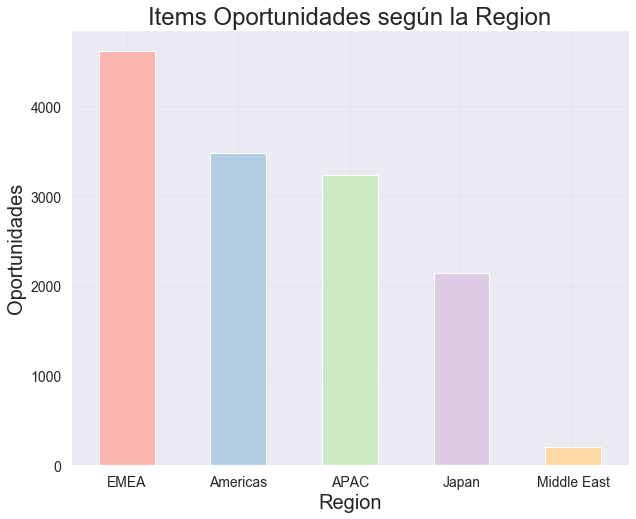

In [120]:
#13684
paired_colors = plt.cm.Pastel1(range(len(grouped_Region_top5)))
grouped_Region_top5.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14, label='index')
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.3)
plt.title('Items Oportunidades según la Region', fontsize=24);
plt.xlabel('Region', fontsize=20);

plt.ylabel('Oportunidades', fontsize=20);

### Grafico de Oportunidades por Region

In [121]:
df_train[df_train.Opportunity_Name =='Opportunity_Name_10112'].transpose()

15817  \
ID                                                   18167   
Region                                                APAC   
Territory                                        Australia   
Pricing, Delivery_Terms_Quote_Appr                       0   
Pricing, Delivery_Terms_Approved                         0   
Bureaucratic_Code_0_Approval                             0   
Bureaucratic_Code_0_Approved                             0   
Submitted_for_Approval                                   0   
Bureaucratic_Code                      Bureaucratic_Code_4   
Account_Created_Date                             7/28/2013   
Source                                                None   
Billing_Country                                  Australia   
Account_Name                             Account_Name_1440   
Opportunity_Name                    Opportunity_Name_10112   
Opportunity_ID                                       10268   
Sales_Contract_No                                     None   
Account_Owner                               Person_Name_43   
Opportunity_Owner                           Person_Name_43   
Account_Type                                Account_Type_0   
Opportunity_Type                        Opportunity_Type_7   
Quote_Type                                     Non Binding   
Delivery_Terms                            Delivery_Terms_1   
Opportunity_Created_Date                        11/19/2018   
Brand                                              Brand_9   
Product_Type                                Product_Type_1   
Size                                                Size_3   
Product_Category_B                                   Other   
Price                                                Other   
Currency                                               USD   
Last_Activity                                          NaT   
Quote_Expiry_Date                                      NaT   
Last_Modified_Date                               12/3/2018   
Last_Modified_By                            Person_Name_43   
Product_Family                          Product_Family_163   
Product_Name                              Product_Name_299   
ASP_Currency                                           USD   
ASP                                                   0.46   
ASP_(converted)_Currency                               USD   
ASP_(converted)                                       0.46   
Planned_Delivery_Start_Date                       2/1/2019   
Planned_Delivery_End_Date                        3/31/2019   
Month                                             2019 - 2   
Delivery_Quarter                                        Q1   
Delivery_Year                                         2019   
Actual_Delivery_Date                                   NaT   
TRF                                                      0   
Total_Amount_Currency                                  USD   
Total_Amount                                        133888   
Total_Taxable_Amount_Currency                          USD   
Total_Taxable_Amount                                531300   
Stage                                          Closed Lost   
Prod_Category_A                       Prod_Category_A_None   
Territory_unified                                Australia   
Region_unified                                        APAC   

                                                     15818  \
ID                                                   18170   
Region                                                APAC   
Territory                                        Australia   
Pricing, Delivery_Terms_Quote_Appr                       0   
Pricing, Delivery_Terms_Approved                         0   
Bureaucratic_Code_0_Approval                             0   
Bureaucratic_Code_0_Approved                             0   
Submitted_for_Approval                                   0   
Bureaucratic_Code                      Bureaucratic_Code_4   
Account_Created_Date  

In [122]:
df_Opportunity_by_Region = df_train.groupby(['Region_unified','Opportunity_Name'])['Region_unified'].count().to_frame()
df_Opportunity_by_Region = df_Opportunity_by_Region.rename(columns={"Region_unified": "total"}).reset_index()
df_Opportunity_by_Region['total']=1
df_Opportunity_by_Region

Region_unified        Opportunity_Name  total
0              APAC  Opportunity_Name_10000      1
1              APAC  Opportunity_Name_10001      1
2              APAC  Opportunity_Name_10002      1
3              APAC  Opportunity_Name_10003      1
4              APAC  Opportunity_Name_10005      1
5              APAC  Opportunity_Name_10007      1
6              APAC  Opportunity_Name_10008      1
7              APAC  Opportunity_Name_10009      1
8              APAC  Opportunity_Name_10010      1
9              APAC  Opportunity_Name_10011      1
10             APAC  Opportunity_Name_10015      1
11             APAC  Opportunity_Name_10017      1
12             APAC  Opportunity_Name_10018      1
13             APAC  Opportunity_Name_10020      1
14             APAC  Opportunity_Name_10021      1
15             APAC  Opportunity_Name_10025      1
16             APAC   Opportunity_Name_1003      1
17             APAC  Opportunity_Name_10031      1
18             APAC  Opportunity_Name_10032      1
19             APAC  Opportunity_Name_10037      1
20             APAC  Opportunity_Name_10038      1
21             APAC   Opportunity_Name_1004      1
22             APAC  Opportunity_Name_10054      1
23             APAC  Opportunity_Name_10055      1
24             APAC  Opportunity_Name_10056      1
25             APAC  Opportunity_Name_10057      1
26             APAC  Opportunity_Name_10058      1
27             APAC  Opportunity_Name_10059      1
28             APAC  Opportunity_Name_10060      1
29             APAC  Opportunity_Name_10061      1
...             ...                     ...    ...
9759    Middle East   Opportunity_Name_6311      1
9760    Middle East   Opportunity_Name_6549      1
9761    Middle East   Opportunity_Name_6621      1
9762    Middle East   Opportunity_Name_6666      1
9763    Middle East   Opportunity_Name_6679      1
9764    Middle East   Opportunity_Name_6886      1
9765    Middle East   Opportunity_Name_6887      1
9766    Middle East   Opportunity_Name_6888      1
9767    Middle East   Opportunity_Name_6889      1
9768    Middle East   Opportunity_Name_6890      1
9769    Middle East   Opportunity_Name_6891      1
9770    Middle East   Opportunity_Name_6952      1
9771    Middle East   Opportunity_Name_7136      1
9772    Middle East   Opportunity_Name_7137      1
9773    Middle East   Opportunity_Name_7138      1
9774    Middle East   Opportunity_Name_7139      1
9775    Middle East   Opportunity_Name_7140      1
9776    Middle East   Opportunity_Name_7141      1
9777    Middle East   Opportunity_Name_7142      1
9778    Middle East   Opportunity_Name_7277      1
9779    Middle East   Opportunity_Name_7463      1
9780    Middle East   Opportunity_Name_7516      1
9781    Middle East   Opportunity_Name_7517      1
9782    Middle East   Opportunity_Name_7536      1
9783    Middle East    Opportunity_Name_901      1
9784    Middle East   Opportunity_Name_9049      1
9785    Middle East   Opportunity_Name_9050      1
9786    Middle East   Opportunity_Name_9057      1
9787    Middle East   Opportunity_Name_9473      1
9788    Middle East   Opportunity_Name_9891      1

[9789 rows x 3 columns]

In [123]:
grouped_Oportunity_Region = df_Opportunity_by_Region['Region_unified'].value_counts().to_frame()
grouped_Oportunity_Region = grouped_Oportunity_Region.rename(columns={"Region_unified": "total"})
grouped_Oportunity_Region

total
EMEA          3207
Americas      2442
APAC          2079
Japan         1897
Middle East    164

In [124]:
grouped_Oportunity_Region = grouped_Oportunity_Region['total'].nlargest(5)
grouped_Oportunity_Region

EMEA           3207
Americas       2442
APAC           2079
Japan          1897
Middle East     164
Name: total, dtype: int64

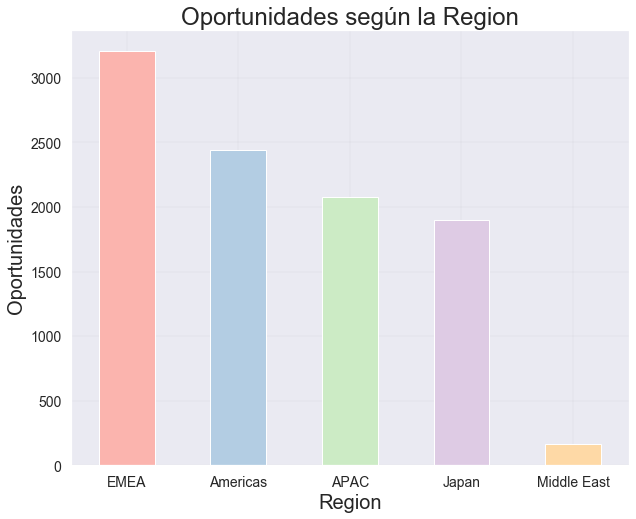

In [125]:
#13684
paired_colors = plt.cm.Pastel1(range(len(grouped_Oportunity_Region)))
grouped_Oportunity_Region.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14, label='index')
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.3)
plt.title('Oportunidades según la Region', fontsize=24);
plt.xlabel('Region', fontsize=20);

plt.ylabel('Oportunidades', fontsize=20);

## Graficos de Mapas

### Mapa de paises segun el ID en el set de datos

In [126]:
from geonamescache.mappers import country

mapper = country(from_key='name', to_key='iso3')

country_index = {}

df_train['iso3'] = df_train.Territory_unified.apply(lambda x: country_index.get(x, mapper(x)))


In [127]:
#assert all(~df_train['iso3']== None )


In [128]:
df_train.iso3.unique()

array([None, 'USA', 'JPN', 'IND', 'ITA', 'DEU', 'GBR', 'ARE', 'GRC',
       'CHE', 'AUT', 'BEL', 'TUN', 'FRA', 'ESP', 'SGP', 'PHL', 'DNK',
       'BLZ', 'POL', 'NOR', 'THA', 'PRT', 'KOR', 'AUS', 'NLD', 'KWT',
       'KHM', 'IDN', 'CHN', 'SAU', 'IRL', 'JOR', 'CYP', 'MAR', 'CRI',
       'TUR', 'SWE', 'MCO', 'KAZ', 'ROU', 'HUN', 'TWN', 'BRA', 'MMR',
       'MKD', 'UKR', 'CZE', 'SLV', 'BLR', 'SLB', 'VNM', 'ARG', 'CHL',
       'BIH', 'XKX', 'GTM', 'LUX', 'URY', 'BGR', 'ARM', 'HRV', 'MYS',
       'GEO', 'COL', 'PER', 'EST', 'PAK', 'CAN', 'CUB', 'MLT', 'TTO',
       'HTI', 'NZL', 'JAM', 'PRI', 'DOM', 'BHS', 'ALB', 'ECU', 'VEN',
       'OMN', 'SVN', 'LBN', 'BOL', 'EGY', 'HND', 'NIC', 'PAN'],
      dtype=object)

In [129]:
#!pip install geopandas


In [130]:
df_train.iso3.replace(to_replace=['None'], value='Sin Datos',inplace=True)


In [131]:
df_train[~df_train.iso3.isna()]


ID    Region       Territory  Pricing, Delivery_Terms_Quote_Appr  \
2      27446  Americas      NW America                                   0   
3      16808  Americas      NW America                                   1   
4      16805  Americas      NW America                                   1   
5      16802  Americas      NW America                                   1   
6      16799  Americas      NW America                                   1   
7      27455  Americas      NW America                                   1   
12     24358     Japan            None                                   1   
17     24425     Japan            None                                   1   
22     24370     Japan            None                                   1   
23     28524      APAC           India                                   1   
24      4915      APAC           India                                   1   
30     24391     Japan            None                                   1   
36     24364     Japan            None                                   1   
43     24404     Japan            None                                   1   
50     24383     Japan            None                                   1   
55     24396     Japan            None                                   1   
61     24411     Japan            None                                   1   
62     18557      EMEA           Italy                                   1   
63     13392      EMEA         Germany                                   0   
64     19342  Americas      NW America                                   0   
65     24444     Japan            None                                   1   
66     18491      EMEA  United Kingdom                                   0   
67     18494      EMEA  United Kingdom                                   0   
68      4920      EMEA  United Kingdom                                   1   
69     17590      EMEA         Germany                                   1   
70     19680      EMEA  United Kingdom                                   0   
71     19683      EMEA  United Kingdom                                   0   
72     19686      EMEA  United Kingdom                                   0   
73     16829      EMEA  United Kingdom                                   0   
74     16834      EMEA  United Kingdom                                   0   
...      ...       ...             ...                                 ...   
16910  24714     Japan            None                                   1   
16913  23770     Japan            None                                   1   
16914  23781     Japan            None                                   1   
16919  21317     Japan            None                                   1   
16920  18513     Japan            None                                   1   
16921  18516     Japan            None                                   1   
16922  18519     Japan            None                                   1   
16923  27689     Japan            None                                   1   
16924  27688     Japan            None                                   1   
16925  19062     Japan           Japan                                   0   
16926  19066     Japan           Japan                                   1   
16928  19906      EMEA          France                                   0   
16929  12703      EMEA          France                                   1   
16930  28372  Americas      SE America                                   1   
16931  17804      EMEA  United Kingdom                                   1   
16932  15785      EMEA         Germany                                   0   
16933  15848      EMEA         Germany                                   0   
16934  15853      EMEA         Germany                                   0   
16935  17677      EMEA         Germany                                   0   
16936  17680      EMEA         G

In [132]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('+proj=robin')
world = world[world.name != 'Antarctica']





In [133]:
world

pop_est                continent                      name iso_a3  \
0       920938                  Oceania                      Fiji    FJI   
1     53950935                   Africa                  Tanzania    TZA   
2       603253                   Africa                 W. Sahara    ESH   
3     35623680            North America                    Canada    CAN   
4    326625791            North America  United States of America    USA   
5     18556698                     Asia                Kazakhstan    KAZ   
6     29748859                     Asia                Uzbekistan    UZB   
7      6909701                  Oceania          Papua New Guinea    PNG   
8    260580739                     Asia                 Indonesia    IDN   
9     44293293            South America                 Argentina    ARG   
10    17789267            South America                     Chile    CHL   
11    83301151                   Africa           Dem. Rep. Congo    COD   
12     7531386                   Africa                   Somalia    SOM   
13    47615739                   Africa                     Kenya    KEN   
14    37345935                   Africa                     Sudan    SDN   
15    12075985                   Africa                      Chad    TCD   
16    10646714            North America                     Haiti    HTI   
17    10734247            North America            Dominican Rep.    DOM   
18   142257519                   Europe                    Russia    RUS   
19      329988            North America                   Bahamas    BHS   
20        2931            South America              Falkland Is.    FLK   
21     5320045                   Europe                    Norway    -99   
22       57713            North America                 Greenland    GRL   
23         140  Seven seas (open ocean)    Fr. S. Antarctic Lands    ATF   
24     1291358                     Asia               Timor-Leste    TLS   
25    54841552                   Africa              South Africa    ZAF   
26     1958042                   Africa                   Lesotho    LSO   
27   124574795            North America                    Mexico    MEX   
28     3360148            South America                   Uruguay    URY   
29   207353391            South America                    Brazil    BRA   
..         ...                      ...                       ...    ...   
146    4926330                     Asia                   Georgia    GEO   
147  104256076                     Asia               Philippines    PHL   
148   31381992                     Asia                  Malaysia    MYS   
149     443593                     Asia                    Brunei    BRN   
150    1972126                   Europe                  Slovenia    SVN   
151    5491218                   Europe                   Finland    FIN   
152    5445829                   Europe                  Slovakia    SVK   
153   10674723                   Europe                   Czechia    CZE   
154    5918919                   Africa                   Eritrea    ERI   
155  126451398                     Asia                     Japan    JPN   
156    6943739            South America                  Paraguay    PRY   
157   28036829                     Asia                     Yemen    YEM   
158   28571770                     Asia              Saudi Arabia    SAU   
160     265100                     Asia                 N. Cyprus    -99   
161    1221549                     Asia                    Cyprus    CYP   
162   33986655                   Africa                   Morocco    MAR   
163   97041072                   Africa                     Egypt    EGY   
164    6653210                   Africa                     Libya    LBY   
165  105350020                   Africa                  Ethiopia    ETH   
166     865267                   Africa                  Djibouti    DJI   
167    3500000                   Africa                

In [134]:
counts = df_train[~df_train.iso3.isna()].iso3.value_counts()
counts.name = 'Total'
world = world.join(counts, on='iso_a3')

In [135]:
#[~df_train.iso3.isna()]
###df con datos de geolocalicación
df_train = df_train.merge(world, left_on='iso3', right_on='iso_a3',how='right')

In [136]:
#df_train.to_csv('./data/train_with_map_data.csv')

In [137]:
df_train.head()

ID    Region   Territory  Pricing, Delivery_Terms_Quote_Appr  \
0  27446.0  Americas  NW America                                 0.0   
1  16808.0  Americas  NW America                                 1.0   
2  16805.0  Americas  NW America                                 1.0   
3  16802.0  Americas  NW America                                 1.0   
4  16799.0  Americas  NW America                                 1.0   

   Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
0                               0.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               0.0                           1.0   

   Bureaucratic_Code_0_Approved  Submitted_for_Approval    Bureaucratic_Code  \
0                           0.0                     0.0  Bureaucratic_Code_4   
1                           0.0                     0.0  Bureaucratic_Code_5   
2                           0.0                     0.0  Bureaucratic_Code_5   
3                           0.0                     0.0  Bureaucratic_Code_5   
4                           0.0                     0.0  Bureaucratic_Code_5   

  Account_Created_Date  ... Territory_unified Region_unified iso3    pop_est  \
0            4/21/2015  ...     United States       Americas  USA  326625791   
1            7/27/2013  ...     United States       Americas  USA  326625791   
2            7/27/2013  ...     United States       Americas  USA  326625791   
3            7/27/2013  ...     United States       Americas  USA  326625791   
4            7/27/2013  ...     United States       Americas  USA  326625791   

       continent                      name iso_a3  gdp_md_est  \
0  North America  United States of America    USA  18560000.0   
1  North America  United States of America    USA  18560000.0   
2  North America  United States of America    USA  18560000.0   
3  North America  United States of America    USA  18560000.0   
4  North America  United States of America    USA  18560000.0   

                                            geometry   Total  
0  MULTIPOLYGON (((-10141906.052 5223243.610, -99...  2903.0  
1  MULTIPOLYGON (((-10141906.052 5223243.610, -99...  2903.0  
2  MULTIPOLYGON (((-10141906.052 5223243.610, -99...  2903.0  
3  MULTIPOLYGON (((-10141906.052 5223243.610, -99...  2903.0  
4  MULTIPOLYGON (((-10141906.052 5223243.610, -99...  2903.0  

[5 rows x 62 columns]

In [138]:
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry   Total  
0  MULTIPOLYGON (((16810130.626 -1718409.644, 167...     NaN  
1  POLYGON ((3202917.599 -101604.324, 3218827.080...     NaN  
2  POLYGON ((-791398.083 2957886.876, -791499.326...     NaN  
3  MULTIPOLYGON (((-10141906.052 5223243.610, -10...    71.0  
4  MULTIPOLYGON (((-10141906.052 5223243.610, -99...  2903.0

In [139]:
world.sort_values('Total', ascending=False).head(20)

pop_est      continent                      name iso_a3  gdp_md_est  \
4     326625791  North America  United States of America    USA  18560000.0   
155   126451398           Asia                     Japan    JPN   4932000.0   
121    80594017         Europe                   Germany    DEU   3979000.0   
137    23232413        Oceania                 Australia    AUS   1189000.0   
98   1281935911           Asia                     India    IND   8721000.0   
130    17084719         Europe               Netherlands    NLD    870800.0   
143    64769452         Europe            United Kingdom    GBR   2788000.0   
129    11491346         Europe                   Belgium    BEL    508600.0   
141    62137802         Europe                     Italy    ITA   2221000.0   
132    48958159         Europe                     Spain    ESP   1690000.0   
139  1379302771           Asia                     China    CHN  21140000.0   
91     68414135           Asia                  Thailand    THA   1161000.0   
8     260580739           Asia                 Indonesia    IDN   3028000.0   
114     8754413         Europe                   Austria    AUT    416600.0   
83     10248069           Asia                    Jordan    JOR     86190.0   
147   104256076           Asia               Philippines    PHL    801900.0   
3      35623680  North America                    Canada    CAN   1674000.0   
128      594130         Europe                Luxembourg    LUX     58740.0   
131    10839514         Europe                  Portugal    PRT    297100.0   
113    38476269         Europe                    Poland    POL   1052000.0   

                                              geometry   Total  
4    MULTIPOLYGON (((-10141906.052 5223243.610, -99...  2903.0  
155  MULTIPOLYGON (((12404312.706 4189251.604, 1238...  2143.0  
121  POLYGON ((1125314.726 5712374.775, 1148605.394...  1682.0  
137  MULTIPOLYGON (((12805614.706 -4362178.055, 128...  1207.0  
98   POLYGON ((8873616.835 3022608.705, 8889925.045...   809.0  
130  POLYGON ((551544.851 5684403.552, 568001.169 5...   533.0  
143  MULTIPOLYGON (((-493519.535 5723612.199, -5527...   313.0  
129  POLYGON ((501933.655 5409902.502, 495064.070 5...   285.0  
141  MULTIPOLYGON (((874016.687 5003677.833, 925545...   283.0  
132  POLYGON ((-657979.261 3967311.026, -664357.856...   268.0  
139  MULTIPOLYGON (((10189609.089 1946276.302, 1010...   218.0  
91   POLYGON ((9850801.787 1526547.087, 9761238.844...   170.0  
8    MULTIPOLYGON (((13315540.260 -278091.137, 1329...   145.0  
114  POLYGON ((1410030.178 5132073.592, 1407439.745...   145.0  
83   POLYGON ((3197727.466 3464671.486, 3209703.584...   102.0  
147  MULTIPOLYGON (((11333866.252 1358770.267, 1127...    95.0  
3    MULTIPOLYGON (((-10141906.052 5223243.610, -10...    71.0  
128  POLYGON ((495064.070 5340139.039, 512234.241 5...    70.0  
131  POLYGON ((-778863.658 4475849.638, -746532.465...    65.0  
113  POLYGON ((1869291.952 5728178.374, 1879432.167...    60.0

In [140]:
###!pip install pysal
#!pip install -U --no-deps mapclassify 

In [141]:
#!pip install descartes

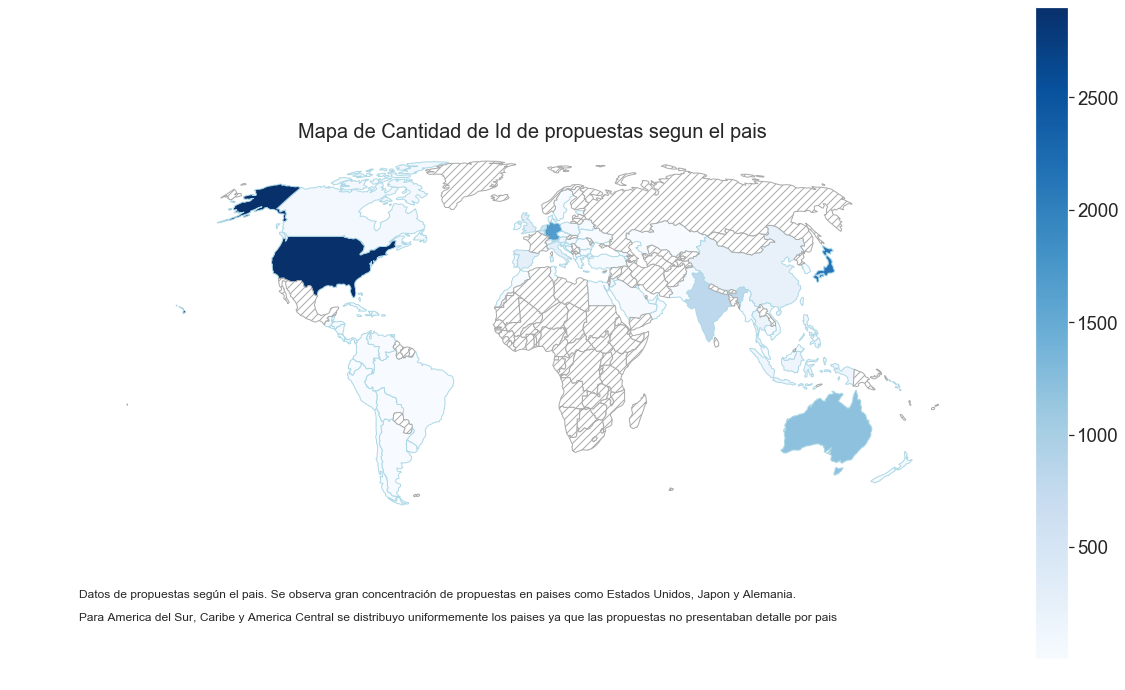

In [142]:
paisesConCasos = world.dropna(subset=['Total'])
paisesSinCasos = world[world['Total'].isna()]

ax = paisesConCasos.plot(column='Total', cmap='Blues', figsize=(20, 12), k=10, legend=True, edgecolor='lightblue')
paisesSinCasos.plot(ax=ax, color='#ffffff', hatch='///', edgecolor='#aaaaaa')

ax.set_title('Mapa de Cantidad de Id de propuestas segun el pais', fontdict={'fontsize': 20}, loc='center')
description = '''
Datos de propuestas según el pais. Se observa gran concentración de propuestas en paises como Estados Unidos, Japon y Alemania. \n
Para America del Sur, Caribe y America Central se distribuyo uniformemente los paises ya que las propuestas no presentaban detalle por pais'''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
legend = ax.get_legend()
#legend.set_bbox_to_anchor((.11, .4))
#legend.prop.set_size(12)

### Corrección en mapa de cantidad de operaciones

El grafico presenta inconsistencias, ya que estamos tomando South America como un todo pero representado en 9 paises y quedaban excluidas las Guyanas y Paraguay. Agregamos el dataset un valor en el campo total para que lo tomen. Como son pocos casos no modifica.


#### Correccion en casos totales en South America

In [143]:
world.loc[(world.continent=='South America'),'Total'] = 9


In [144]:
world[world.continent=='South America']

pop_est      continent          name iso_a3  gdp_md_est  \
9     44293293  South America     Argentina    ARG    879400.0   
10    17789267  South America         Chile    CHL    436100.0   
20        2931  South America  Falkland Is.    FLK       281.8   
28     3360148  South America       Uruguay    URY     73250.0   
29   207353391  South America        Brazil    BRA   3081000.0   
30    11138234  South America       Bolivia    BOL     78350.0   
31    31036656  South America          Peru    PER    410400.0   
32    47698524  South America      Colombia    COL    688000.0   
40    31304016  South America     Venezuela    VEN    468600.0   
41      737718  South America        Guyana    GUY      6093.0   
42      591919  South America      Suriname    SUR      8547.0   
44    16290913  South America       Ecuador    ECU    182400.0   
156    6943739  South America      Paraguay    PRY     64670.0   

                                              geometry  Total  
9    MULTIPOLYGON (((-5518836.616 -5598093.654, -54...    9.0  
10   MULTIPOLYGON (((-5518836.616 -5598093.654, -54...    9.0  
20   POLYGON ((-4950869.681 -5517533.871, -4875637....    9.0  
28   POLYGON ((-5222856.014 -3231696.542, -5165791....    9.0  
29   POLYGON ((-4776893.995 -3611664.215, -4812062....    9.0  
30   POLYGON ((-6533260.003 -1171309.001, -6462888....    9.0  
31   POLYGON ((-6596232.740 -459699.292, -6681415.9...    9.0  
32   POLYGON ((-6317593.241 134049.312, -6335544.05...    9.0  
40   POLYGON ((-5729323.869 556179.612, -5717618.22...    9.0  
41   POLYGON ((-5340397.978 203157.587, -5363425.88...    9.0  
42   POLYGON ((-5149555.137 247256.668, -5203334.56...    9.0  
44   POLYGON ((-7121013.145 -16260.088, -7107439.54...    9.0  
156  POLYGON ((-5395933.188 -2157937.149, -5363385....    9.0

#### Correccion de casos totales en Carribean

In [145]:
#Dominican Rep no coincide el nombre, se tuvo que cambiar
Carribean = ["Cuba","Trinidad and Tobago", "Haiti",'Jamaica',"Puerto Rico", "Dominican Rep.", "Bahamas"]

world.loc[(world.name.isin(Carribean))]


pop_est      continent                 name iso_a3  gdp_md_est  \
16   10646714  North America                Haiti    HTI     19340.0   
17   10734247  North America       Dominican Rep.    DOM    161900.0   
19     329988  North America              Bahamas    BHS      9066.0   
45    3351827  North America          Puerto Rico    PRI    131000.0   
46    2990561  North America              Jamaica    JAM     25390.0   
47   11147407  North America                 Cuba    CUB    132900.0   
175   1218208  North America  Trinidad and Tobago    TTO     43570.0   

                                              geometry  Total  
16   POLYGON ((-6657796.595 2108496.606, -6655812.8...    4.0  
17   POLYGON ((-6676058.533 1929944.389, -6671160.3...    4.0  
19   MULTIPOLYGON (((-7229455.058 2865226.366, -718...    4.0  
45   POLYGON ((-6166125.252 1980186.489, -6119470.4...    4.0  
46   POLYGON ((-7216438.882 1977594.379, -7154894.3...    4.0  
47   POLYGON ((-7590791.575 2480071.811, -7512127.3...    5.0  
175  POLYGON ((-5796692.599 1150802.640, -5741973.2...    4.0

In [146]:
world[world.name.str.contains('Domin')]

pop_est      continent            name iso_a3  gdp_md_est  \
17  10734247  North America  Dominican Rep.    DOM    161900.0   

                                             geometry  Total  
17  POLYGON ((-6676058.533 1929944.389, -6671160.3...    4.0

In [147]:

world.loc[(world.continent=='North America') & (world.name.isin(Carribean))].groupby('continent').sum()



pop_est  gdp_md_est  Total
continent                                 
North America  40418952    523166.0   29.0

In [148]:
world.loc[(world.continent=='North America') & (world.name.isin(Carribean)),'Total'] = 30


#### Correccion de casos totales en Central America

In [149]:
CentralAmerica = ["Belize","Costa Rica","El Salvador", "Guatemala",'Honduras', "Nicaragua", "Panama"]

world.loc[(world.continent=='North America') & (world.name.isin(CentralAmerica))]


pop_est      continent         name iso_a3  gdp_md_est  \
33   3753142  North America       Panama    PAN     93120.0   
34   4930258  North America   Costa Rica    CRI     79260.0   
35   6025951  North America    Nicaragua    NIC     33550.0   
36   9038741  North America     Honduras    HND     43190.0   
37   6172011  North America  El Salvador    SLV     54790.0   
38  15460732  North America    Guatemala    GTM    131800.0   
39    360346  North America       Belize    BLZ      3088.0   

                                             geometry  Total  
33  POLYGON ((-7282002.498 927327.138, -7294190.60...    1.0  
34  POLYGON ((-7765577.595 1023116.582, -7802508.3...    1.0  
35  POLYGON ((-7860677.966 1169921.817, -7884702.0...    1.0  
36  POLYGON ((-7776977.047 1603832.052, -7808818.8...    1.0  
37  POLYGON ((-8363817.925 1542688.319, -8337128.7...    1.0  
38  POLYGON ((-8631583.388 1554955.209, -8625948.6...    1.0  
39  POLYGON ((-8302445.688 1904631.333, -8301184.5...    2.0

In [150]:
total_CentralAmerica = world.loc[(world.continent=='North America') & (world.name.isin(CentralAmerica))].groupby('continent').sum()
print(total_CentralAmerica)

                pop_est  gdp_md_est  Total
continent                                 
North America  45741181    438798.0    8.0


In [151]:
world.loc[(world.continent=='North America') & (world.name.isin(CentralAmerica)),'Total'] = 37

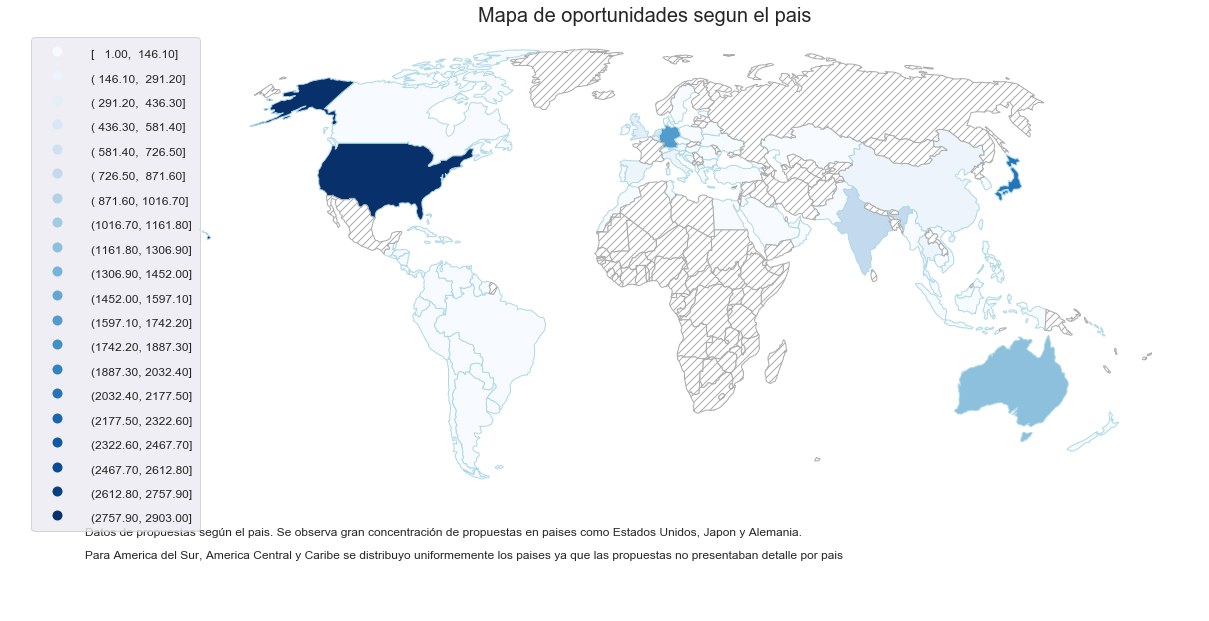

In [152]:
paisesConCasos = world.dropna(subset=['Total'])
paisesSinCasos = world[world['Total'].isna()] 

ax = paisesConCasos.plot(column='Total', cmap='Blues', figsize=(20, 12), k=20, legend=True, edgecolor='lightblue',scheme='EqualInterval')
paisesSinCasos.plot(ax=ax, color='#ffffff', hatch='///', edgecolor='#aaaaaa')

ax.set_title('Mapa de oportunidades segun el pais', fontdict={'fontsize': 20}, loc='center')
description = '''
Datos de propuestas según el pais. Se observa gran concentración de propuestas en paises como Estados Unidos, Japon y Alemania. \n
Para America del Sur, America Central y Caribe se distribuyo uniformemente los paises ya que las propuestas no presentaban detalle por pais'''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
legend = ax.get_legend()

legend.set_bbox_to_anchor((.11, 1))
legend.prop.set_size(12)

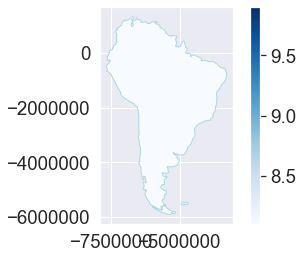

In [153]:
# dissolve the state boundary by region 
southAmerica = world[world.continent=='South America'].dissolve(by='continent')

# view the resulting geodataframe
ax = southAmerica.plot( column='Total', cmap='Blues', k=10,legend=True, edgecolor='lightblue')

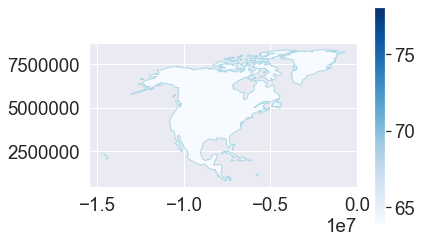

In [154]:
# dissolve the state boundary by region 
NorthAmerica = world[world.continent=='North America'].dissolve(by='continent')

# view the resulting geodataframe
ax = NorthAmerica.plot( column='Total', cmap='Blues', k=10,legend=True, edgecolor='lightblue')

In [155]:
NorthAmerica

geometry   pop_est  \
continent                                                                    
North America  MULTIPOLYGON (((-5796692.599 1150802.640, -574...  35623680   

                 name iso_a3  gdp_md_est  Total  
continent                                        
North America  Canada    CAN   1674000.0   71.0

In [156]:
world[world.continent=='North America']

pop_est      continent                      name iso_a3  gdp_md_est  \
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
16    10646714  North America                     Haiti    HTI     19340.0   
17    10734247  North America            Dominican Rep.    DOM    161900.0   
19      329988  North America                   Bahamas    BHS      9066.0   
22       57713  North America                 Greenland    GRL      2173.0   
27   124574795  North America                    Mexico    MEX   2307000.0   
33     3753142  North America                    Panama    PAN     93120.0   
34     4930258  North America                Costa Rica    CRI     79260.0   
35     6025951  North America                 Nicaragua    NIC     33550.0   
36     9038741  North America                  Honduras    HND     43190.0   
37     6172011  North America               El Salvador    SLV     54790.0   
38    15460732  North America                 Guatemala    GTM    131800.0   
39      360346  North America                    Belize    BLZ      3088.0   
45     3351827  North America               Puerto Rico    PRI    131000.0   
46     2990561  North America                   Jamaica    JAM     25390.0   
47    11147407  North America                      Cuba    CUB    132900.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   

                                              geometry   Total  
3    MULTIPOLYGON (((-10141906.052 5223243.610, -10...    71.0  
4    MULTIPOLYGON (((-10141906.052 5223243.610, -99...  2903.0  
16   POLYGON ((-6657796.595 2108496.606, -6655812.8...    30.0  
17   POLYGON ((-6676058.533 1929944.389, -6671160.3...    30.0  
19   MULTIPOLYGON (((-7229455.058 2865226.366, -718...    30.0  
22   POLYGON ((-2627201.180 8280938.168, -2414731.2...     NaN  
27   POLYGON ((-10531523.735 3479791.470, -10426403...     NaN  
33   POLYGON ((-7282002.498 927327.138, -7294190.60...    37.0  
34   POLYGON ((-7765577.595 1023116.582, -7802508.3...    37.0  
35   POLYGON ((-7860677.966 1169921.817, -7884702.0...    37.0  
36   POLYGON ((-7776977.047 1603832.052, -7808818.8...    37.0  
37   POLYGON ((-8363817.925 1542688.319, -8337128.7...    37.0  
38   POLYGON ((-8631583.388 1554955.209, -8625948.6...    37.0  
39   POLYGON ((-8302445.688 1904631.333, -8301184.5...    37.0  
45   POLYGON ((-6166125.252 1980186.489, -6119470.4...    30.0  
46   POLYGON ((-7216438.882 1977594.379, -7154894.3...    30.0  
47   POLYGON ((-7590791.575 2480071.811, -7512127.3...    30.0  
175  POLYGON ((-5796692.599 1150802.640, -5741973.2...    30.0

### Grafico por continente

In [157]:
continents = world[(world.name!="Antarctica")]


In [158]:
continents.loc[:,'Total'] = 1
continents

pop_est                continent                      name iso_a3  \
0       920938                  Oceania                      Fiji    FJI   
1     53950935                   Africa                  Tanzania    TZA   
2       603253                   Africa                 W. Sahara    ESH   
3     35623680            North America                    Canada    CAN   
4    326625791            North America  United States of America    USA   
5     18556698                     Asia                Kazakhstan    KAZ   
6     29748859                     Asia                Uzbekistan    UZB   
7      6909701                  Oceania          Papua New Guinea    PNG   
8    260580739                     Asia                 Indonesia    IDN   
9     44293293            South America                 Argentina    ARG   
10    17789267            South America                     Chile    CHL   
11    83301151                   Africa           Dem. Rep. Congo    COD   
12     7531386                   Africa                   Somalia    SOM   
13    47615739                   Africa                     Kenya    KEN   
14    37345935                   Africa                     Sudan    SDN   
15    12075985                   Africa                      Chad    TCD   
16    10646714            North America                     Haiti    HTI   
17    10734247            North America            Dominican Rep.    DOM   
18   142257519                   Europe                    Russia    RUS   
19      329988            North America                   Bahamas    BHS   
20        2931            South America              Falkland Is.    FLK   
21     5320045                   Europe                    Norway    -99   
22       57713            North America                 Greenland    GRL   
23         140  Seven seas (open ocean)    Fr. S. Antarctic Lands    ATF   
24     1291358                     Asia               Timor-Leste    TLS   
25    54841552                   Africa              South Africa    ZAF   
26     1958042                   Africa                   Lesotho    LSO   
27   124574795            North America                    Mexico    MEX   
28     3360148            South America                   Uruguay    URY   
29   207353391            South America                    Brazil    BRA   
..         ...                      ...                       ...    ...   
146    4926330                     Asia                   Georgia    GEO   
147  104256076                     Asia               Philippines    PHL   
148   31381992                     Asia                  Malaysia    MYS   
149     443593                     Asia                    Brunei    BRN   
150    1972126                   Europe                  Slovenia    SVN   
151    5491218                   Europe                   Finland    FIN   
152    5445829                   Europe                  Slovakia    SVK   
153   10674723                   Europe                   Czechia    CZE   
154    5918919                   Africa                   Eritrea    ERI   
155  126451398                     Asia                     Japan    JPN   
156    6943739            South America                  Paraguay    PRY   
157   28036829                     Asia                     Yemen    YEM   
158   28571770                     Asia              Saudi Arabia    SAU   
160     265100                     Asia                 N. Cyprus    -99   
161    1221549                     Asia                    Cyprus    CYP   
162   33986655                   Africa                   Morocco    MAR   
163   97041072                   Africa                     Egypt    EGY   
164    6653210                   Africa                     Libya    LBY   
165  105350020                   Africa                  Ethiopia    ETH   
166     865267                   Africa                  Djibouti    DJI   
167    3500000                   Africa                

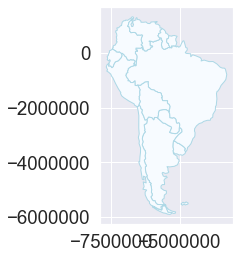

In [159]:
continents[continents.continent=='South America'].plot( column='Total', cmap='Blues', k=10, edgecolor='lightblue')


In [160]:
#counts = df_train[~df_train.iso3.isna()].iso3.value_counts()

df_train[~df_train.Actual_Delivery_Date.isna()].Actual_Delivery_Date.value_counts()


NaT    12078
Name: Actual_Delivery_Date, dtype: int64

In [161]:
columna = df_train.Actual_Delivery_Date
df_train[~columna.isna()].Actual_Delivery_Date.value_counts()


NaT    12078
Name: Actual_Delivery_Date, dtype: int64

In [162]:
pd.isna(df_train.Actual_Delivery_Date).value_counts()

False    12078
True        94
Name: Actual_Delivery_Date, dtype: int64

In [163]:
df_train.Actual_Delivery_Date.count()

12078

In [164]:
 df_train['Product_Family'].value_counts().nlargest(10)

Product_Family_77     1141
Product_Family_133    1081
Product_Family_132     706
Product_Family_100     551
Product_Family_212     538
Product_Family_115     488
Product_Family_85      484
Product_Family_109     467
Product_Family_208     407
Product_Family_128     398
Name: Product_Family, dtype: int64

In [165]:
df_train.groupby('Opportunity_Name')['Total'].count().to_frame().sort_values('Total')

Total
Opportunity_Name             
Opportunity_Name_4268       1
Opportunity_Name_5893       1
Opportunity_Name_5892       1
Opportunity_Name_5889       1
Opportunity_Name_5888       1
Opportunity_Name_5887       1
Opportunity_Name_5886       1
Opportunity_Name_5885       1
Opportunity_Name_5884       1
Opportunity_Name_5883       1
Opportunity_Name_5882       1
Opportunity_Name_5881       1
Opportunity_Name_5880       1
Opportunity_Name_5879       1
Opportunity_Name_5878       1
Opportunity_Name_5877       1
Opportunity_Name_5876       1
Opportunity_Name_5873       1
Opportunity_Name_5872       1
Opportunity_Name_5871       1
Opportunity_Name_5866       1
Opportunity_Name_5865       1
Opportunity_Name_5862       1
Opportunity_Name_5860       1
Opportunity_Name_586        1
Opportunity_Name_5859       1
Opportunity_Name_5894       1
Opportunity_Name_5897       1
Opportunity_Name_5898       1
Opportunity_Name_5899       1
...                       ...
Opportunity_Name_10437     10
Opportunity_Name_9011      10
Opportunity_Name_4780      10
Opportunity_Name_2905      10
Opportunity_Name_10130     10
Opportunity_Name_4779      10
Opportunity_Name_10951     11
Opportunity_Name_10653     11
Opportunity_Name_4769      12
Opportunity_Name_4771      12
Opportunity_Name_2380      12
Opportunity_Name_5331      12
Opportunity_Name_9976      13
Opportunity_Name_809       13
Opportunity_Name_10929     13
Opportunity_Name_10434     13
Opportunity_Name_10136     14
Opportunity_Name_847       14
Opportunity_Name_10928     14
Opportunity_Name_10946     16
Opportunity_Name_10131     16
Opportunity_Name_9628      16
Opportunity_Name_4889      16
Opportunity_Name_10944     16
Opportunity_Name_10945     16
Opportunity_Name_1661      18
Opportunity_Name_6835      24
Opportunity_Name_11461     26
Opportunity_Name_12179     26
Opportunity_Name_5036      36

[8516 rows x 1 columns]

In [166]:
df_train[df_train['Opportunity_Name']=='Opportunity_Name_5036']

ID    Region   Territory  Pricing, Delivery_Terms_Quote_Appr  \
2747  20112.0  Americas  NW America                                 1.0   
2748  20115.0  Americas  NW America                                 1.0   
2749  20118.0  Americas  NW America                                 1.0   
2750  20122.0  Americas  NW America                                 1.0   
2751  20125.0  Americas  NW America                                 1.0   
2752  20128.0  Americas  NW America                                 1.0   
2753  20132.0  Americas  NW America                                 1.0   
2754  20135.0  Americas  NW America                                 1.0   
2755  20138.0  Americas  NW America                                 1.0   
2756  20141.0  Americas  NW America                                 1.0   
2757  20145.0  Americas  NW America                                 1.0   
2758  20151.0  Americas  NW America                                 1.0   
2759  20245.0  Americas  NW America                                 1.0   
2760  20185.0  Americas  NW America                                 1.0   
2761  20189.0  Americas  NW America                                 1.0   
2762  20192.0  Americas  NW America                                 1.0   
2763  20195.0  Americas  NW America                                 1.0   
2764  20199.0  Americas  NW America                                 1.0   
2765  20202.0  Americas  NW America                                 1.0   
2766  20205.0  Americas  NW America                                 1.0   
2767  20208.0  Americas  NW America                                 1.0   
2768  20212.0  Americas  NW America                                 1.0   
2769  20215.0  Americas  NW America                                 1.0   
2770  20218.0  Americas  NW America                                 1.0   
2771  20222.0  Americas  NW America                                 1.0   
2772  20225.0  Americas  NW America                                 1.0   
2773  20228.0  Americas  NW America                                 1.0   
2774  20232.0  Americas  NW America                                 1.0   
2775  20235.0  Americas  NW America                                 1.0   
2776  20238.0  Americas  NW America                                 1.0   
2777  20241.0  Americas  NW America                                 1.0   
2778  20248.0  Americas  NW America                                 1.0   
2779  20251.0  Americas  NW America                                 1.0   
2780  20255.0  Americas  NW America                                 1.0   
2781  20258.0  Americas  NW America                                 1.0   
2782  20261.0  Americas  NW America                                 1.0   

      Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
2747                               1.0                           1.0   
2748                               1.0                           1.0   
2749                               1.0                           1.0   
2750                               1.0                           1.0   
2751                               1.0                           1.0   
2752                               1.0                           1.0   
2753                               1.0                           1.0   
2754                               1.0                           1.0   
2755                               1.0                           1.0   
2756                               1.0                           1.0   
2757                               1.0                           1.0   
2758                               1.0                           1.0   
2759                               1.0                           1.0   
2760                               1.0                           1.0   
2761                               1.0                           1.0   
2762                               1.0                           1.0   
2763       

In [167]:

df_train[df_train['Opportunity_Name']=='Opportunity_Name_4779'].transpose()

10338  \
ID                                                                              12154   
Region                                                                           APAC   
Territory                                                                   Australia   
Pricing, Delivery_Terms_Quote_Appr                                                  1   
Pricing, Delivery_Terms_Approved                                                    1   
Bureaucratic_Code_0_Approval                                                        1   
Bureaucratic_Code_0_Approved                                                        1   
Submitted_for_Approval                                                              0   
Bureaucratic_Code                                                 Bureaucratic_Code_4   
Account_Created_Date                                                        9/28/2016   
Source                                                                           None   
Billing_Country                                                             Australia   
Account_Name                                                         Account_Name_660   
Opportunity_Name                                                Opportunity_Name_4779   
Opportunity_ID                                                                   8120   
Sales_Contract_No                                                                4779   
Account_Owner                                                          Person_Name_43   
Opportunity_Owner                                                      Person_Name_43   
Account_Type                                                           Account_Type_0   
Opportunity_Type                                                   Opportunity_Type_7   
Quote_Type                                                                Non Binding   
Delivery_Terms                                                       Delivery_Terms_1   
Opportunity_Created_Date                                                     5/4/2018   
Brand                                                                            None   
Product_Type                                                                     None   
Size                                                                             None   
Product_Category_B                                                               None   
Price                                                                            None   
Currency                                                                         None   
Last_Activity                                                                     NaT   
...                                                                               ...   
Last_Modified_By                                                       Person_Name_43   
Product_Family                                                     Product_Family_109   
Product_Name                                                         Product_Name_148   
ASP_Currency                                                                      USD   
ASP                                                                             0.295   
ASP_(converted)_Currency                                                          USD   
ASP_(converted)                                                                 0.295   
Planned_Delivery_Start_Date                                                 8/27/2018   
Planned_Delivery_End_Date                                                   9/28/2018   
Month                                                                        2018 - 8   
Delivery_Quarter                                                                   Q3   
Delivery_Year                                                                    2018   
Actual_Delivery_Date                                                              NaT   
TRF                                                                        

### Mapa de paises por oportunidades

Genero el mapa agrupando por oportunidades

In [168]:
df_train_oportunity = df_train.groupby(['Opportunity_Name','iso_a3'])['Total'].count().to_frame().sort_values('Total')

In [169]:
df_train_oportunity.head(10)

Total
Opportunity_Name      iso_a3       
Opportunity_Name_4268 JPN         1
Opportunity_Name_5897 JPN         1
Opportunity_Name_5894 IND         1
Opportunity_Name_5893 DEU         1
Opportunity_Name_5892 JPN         1
Opportunity_Name_5889 JPN         1
Opportunity_Name_5888 USA         1
Opportunity_Name_5887 JPN         1
Opportunity_Name_5886 JPN         1
Opportunity_Name_5885 JPN         1

In [170]:

world_oportunity = world[world.name != 'Antarctica']



In [171]:
df_train_oportunity = df_train_oportunity.reset_index()

In [172]:
df_train_oportunity[df_train_oportunity.iso_a3=='CAN']

Opportunity_Name iso_a3  Total
314     Opportunity_Name_538    CAN      1
335     Opportunity_Name_544    CAN      1
728    Opportunity_Name_6204    CAN      1
831     Opportunity_Name_648    CAN      1
865     Opportunity_Name_647    CAN      1
975     Opportunity_Name_418    CAN      1
1020    Opportunity_Name_410    CAN      1
1037    Opportunity_Name_407    CAN      1
1328   Opportunity_Name_3977    CAN      1
1341    Opportunity_Name_406    CAN      1
1387    Opportunity_Name_386    CAN      1
1395    Opportunity_Name_387    CAN      1
1453   Opportunity_Name_5073    CAN      1
1487    Opportunity_Name_507    CAN      1
1889   Opportunity_Name_4834    CAN      1
2294   Opportunity_Name_8702    CAN      1
2356   Opportunity_Name_8630    CAN      1
2358   Opportunity_Name_8629    CAN      1
2371   Opportunity_Name_8602    CAN      1
2401   Opportunity_Name_9712    CAN      1
2583    Opportunity_Name_983    CAN      1
2736   Opportunity_Name_9545    CAN      1
3464   Opportunity_Name_8217    CAN      1
3764   Opportunity_Name_7861    CAN      1
3777   Opportunity_Name_7860    CAN      1
3816   Opportunity_Name_1394    CAN      1
3817   Opportunity_Name_1392    CAN      1
3818   Opportunity_Name_1391    CAN      1
3853   Opportunity_Name_1403    CAN      1
3914   Opportunity_Name_1506    CAN      1
...                      ...    ...    ...
3916   Opportunity_Name_1504    CAN      1
3917   Opportunity_Name_1503    CAN      1
3919   Opportunity_Name_1502    CAN      1
3924   Opportunity_Name_1499    CAN      1
3925   Opportunity_Name_1498    CAN      1
3935   Opportunity_Name_1538    CAN      1
3939   Opportunity_Name_1534    CAN      1
3942   Opportunity_Name_1531    CAN      1
3996   Opportunity_Name_1469    CAN      1
4448   Opportunity_Name_1607    CAN      1
4479   Opportunity_Name_1597    CAN      1
4570   Opportunity_Name_1656    CAN      1
4724   Opportunity_Name_1141    CAN      1
4890  Opportunity_Name_11554    CAN      1
5346   Opportunity_Name_1135    CAN      1
5746  Opportunity_Name_10451    CAN      1
5749  Opportunity_Name_10452    CAN      1
5773    Opportunity_Name_349    CAN      1
6273   Opportunity_Name_1067    CAN      1
6310   Opportunity_Name_1068    CAN      1
6822    Opportunity_Name_998    CAN      2
6998   Opportunity_Name_8615    CAN      2
7010    Opportunity_Name_984    CAN      2
7027   Opportunity_Name_8669    CAN      2
7066   Opportunity_Name_1105    CAN      2
7330    Opportunity_Name_402    CAN      2
7351    Opportunity_Name_413    CAN      2
7550   Opportunity_Name_1637    CAN      2
7622   Opportunity_Name_1347    CAN      2
7750   Opportunity_Name_1612    CAN      2

[61 rows x 3 columns]

In [173]:
counts_oportunity = df_train_oportunity[~df_train_oportunity.iso_a3.isna()].iso_a3.value_counts()
counts_oportunity.name = 'Total_oportunity'
world_oportunity = world_oportunity.join(counts_oportunity, on='iso_a3')

In [174]:
world_oportunity

pop_est                continent                      name iso_a3  \
0       920938                  Oceania                      Fiji    FJI   
1     53950935                   Africa                  Tanzania    TZA   
2       603253                   Africa                 W. Sahara    ESH   
3     35623680            North America                    Canada    CAN   
4    326625791            North America  United States of America    USA   
5     18556698                     Asia                Kazakhstan    KAZ   
6     29748859                     Asia                Uzbekistan    UZB   
7      6909701                  Oceania          Papua New Guinea    PNG   
8    260580739                     Asia                 Indonesia    IDN   
9     44293293            South America                 Argentina    ARG   
10    17789267            South America                     Chile    CHL   
11    83301151                   Africa           Dem. Rep. Congo    COD   
12     7531386                   Africa                   Somalia    SOM   
13    47615739                   Africa                     Kenya    KEN   
14    37345935                   Africa                     Sudan    SDN   
15    12075985                   Africa                      Chad    TCD   
16    10646714            North America                     Haiti    HTI   
17    10734247            North America            Dominican Rep.    DOM   
18   142257519                   Europe                    Russia    RUS   
19      329988            North America                   Bahamas    BHS   
20        2931            South America              Falkland Is.    FLK   
21     5320045                   Europe                    Norway    -99   
22       57713            North America                 Greenland    GRL   
23         140  Seven seas (open ocean)    Fr. S. Antarctic Lands    ATF   
24     1291358                     Asia               Timor-Leste    TLS   
25    54841552                   Africa              South Africa    ZAF   
26     1958042                   Africa                   Lesotho    LSO   
27   124574795            North America                    Mexico    MEX   
28     3360148            South America                   Uruguay    URY   
29   207353391            South America                    Brazil    BRA   
..         ...                      ...                       ...    ...   
146    4926330                     Asia                   Georgia    GEO   
147  104256076                     Asia               Philippines    PHL   
148   31381992                     Asia                  Malaysia    MYS   
149     443593                     Asia                    Brunei    BRN   
150    1972126                   Europe                  Slovenia    SVN   
151    5491218                   Europe                   Finland    FIN   
152    5445829                   Europe                  Slovakia    SVK   
153   10674723                   Europe                   Czechia    CZE   
154    5918919                   Africa                   Eritrea    ERI   
155  126451398                     Asia                     Japan    JPN   
156    6943739            South America                  Paraguay    PRY   
157   28036829                     Asia                     Yemen    YEM   
158   28571770                     Asia              Saudi Arabia    SAU   
160     265100                     Asia                 N. Cyprus    -99   
161    1221549                     Asia                    Cyprus    CYP   
162   33986655                   Africa                   Morocco    MAR   
163   97041072                   Africa                     Egypt    EGY   
164    6653210                   Africa                     Libya    LBY   
165  105350020                   Africa                  Ethiopia    ETH   
166     865267                   Africa                  Djibouti    DJI   
167    3500000                   Africa                

In [175]:
#Dominican Rep no coincide el nombre, se tuvo que cambiar
Carribean = ["Cuba","Trinidad and Tobago", "Haiti",'Jamaica',"Puerto Rico", "Dominican Rep.", "Bahamas"]

world_oportunity.loc[(world_oportunity.name.isin(Carribean))]


pop_est      continent                 name iso_a3  gdp_md_est  \
16   10646714  North America                Haiti    HTI     19340.0   
17   10734247  North America       Dominican Rep.    DOM    161900.0   
19     329988  North America              Bahamas    BHS      9066.0   
45    3351827  North America          Puerto Rico    PRI    131000.0   
46    2990561  North America              Jamaica    JAM     25390.0   
47   11147407  North America                 Cuba    CUB    132900.0   
175   1218208  North America  Trinidad and Tobago    TTO     43570.0   

                                              geometry  Total  \
16   POLYGON ((-6657796.595 2108496.606, -6655812.8...   30.0   
17   POLYGON ((-6676058.533 1929944.389, -6671160.3...   30.0   
19   MULTIPOLYGON (((-7229455.058 2865226.366, -718...   30.0   
45   POLYGON ((-6166125.252 1980186.489, -6119470.4...   30.0   
46   POLYGON ((-7216438.882 1977594.379, -7154894.3...   30.0   
47   POLYGON ((-7590791.575 2480071.811, -7512127.3...   30.0   
175  POLYGON ((-5796692.599 1150802.640, -5741973.2...   30.0   

     Total_oportunity  
16                4.0  
17                4.0  
19                4.0  
45                4.0  
46                4.0  
47                5.0  
175               4.0

In [176]:
CentralAmerica = ["Belize","Costa Rica","El Salvador", "Guatemala",'Honduras', "Nicaragua", "Panama"]

world_oportunity.loc[(world_oportunity.continent=='North America') & (world_oportunity.name.isin(CentralAmerica))]

pop_est      continent         name iso_a3  gdp_md_est  \
33   3753142  North America       Panama    PAN     93120.0   
34   4930258  North America   Costa Rica    CRI     79260.0   
35   6025951  North America    Nicaragua    NIC     33550.0   
36   9038741  North America     Honduras    HND     43190.0   
37   6172011  North America  El Salvador    SLV     54790.0   
38  15460732  North America    Guatemala    GTM    131800.0   
39    360346  North America       Belize    BLZ      3088.0   

                                             geometry  Total  Total_oportunity  
33  POLYGON ((-7282002.498 927327.138, -7294190.60...   37.0               1.0  
34  POLYGON ((-7765577.595 1023116.582, -7802508.3...   37.0               1.0  
35  POLYGON ((-7860677.966 1169921.817, -7884702.0...   37.0               1.0  
36  POLYGON ((-7776977.047 1603832.052, -7808818.8...   37.0               1.0  
37  POLYGON ((-8363817.925 1542688.319, -8337128.7...   37.0               1.0  
38  POLYGON ((-8631583.388 1554955.209, -8625948.6...   37.0               1.0  
39  POLYGON ((-8302445.688 1904631.333, -8301184.5...   37.0               2.0

a modo de coreccion agregamos para americo del sur Paragua y Guyanas para mejorar la representacion

In [177]:
world_oportunity.loc[(world_oportunity.continent=='South America')]

pop_est      continent          name iso_a3  gdp_md_est  \
9     44293293  South America     Argentina    ARG    879400.0   
10    17789267  South America         Chile    CHL    436100.0   
20        2931  South America  Falkland Is.    FLK       281.8   
28     3360148  South America       Uruguay    URY     73250.0   
29   207353391  South America        Brazil    BRA   3081000.0   
30    11138234  South America       Bolivia    BOL     78350.0   
31    31036656  South America          Peru    PER    410400.0   
32    47698524  South America      Colombia    COL    688000.0   
40    31304016  South America     Venezuela    VEN    468600.0   
41      737718  South America        Guyana    GUY      6093.0   
42      591919  South America      Suriname    SUR      8547.0   
44    16290913  South America       Ecuador    ECU    182400.0   
156    6943739  South America      Paraguay    PRY     64670.0   

                                              geometry  Total  \
9    MULTIPOLYGON (((-5518836.616 -5598093.654, -54...    9.0   
10   MULTIPOLYGON (((-5518836.616 -5598093.654, -54...    9.0   
20   POLYGON ((-4950869.681 -5517533.871, -4875637....    9.0   
28   POLYGON ((-5222856.014 -3231696.542, -5165791....    9.0   
29   POLYGON ((-4776893.995 -3611664.215, -4812062....    9.0   
30   POLYGON ((-6533260.003 -1171309.001, -6462888....    9.0   
31   POLYGON ((-6596232.740 -459699.292, -6681415.9...    9.0   
32   POLYGON ((-6317593.241 134049.312, -6335544.05...    9.0   
40   POLYGON ((-5729323.869 556179.612, -5717618.22...    9.0   
41   POLYGON ((-5340397.978 203157.587, -5363425.88...    9.0   
42   POLYGON ((-5149555.137 247256.668, -5203334.56...    9.0   
44   POLYGON ((-7121013.145 -16260.088, -7107439.54...    9.0   
156  POLYGON ((-5395933.188 -2157937.149, -5363385....    9.0   

     Total_oportunity  
9                 1.0  
10                1.0  
20                NaN  
28                1.0  
29                1.0  
30                1.0  
31                1.0  
32                1.0  
40                1.0  
41                NaN  
42                NaN  
44                1.0  
156               NaN

In [178]:
# correccion para agregar 
world_oportunity.loc[(world_oportunity.continent=='South America'),'Total_oportunity'] = 1


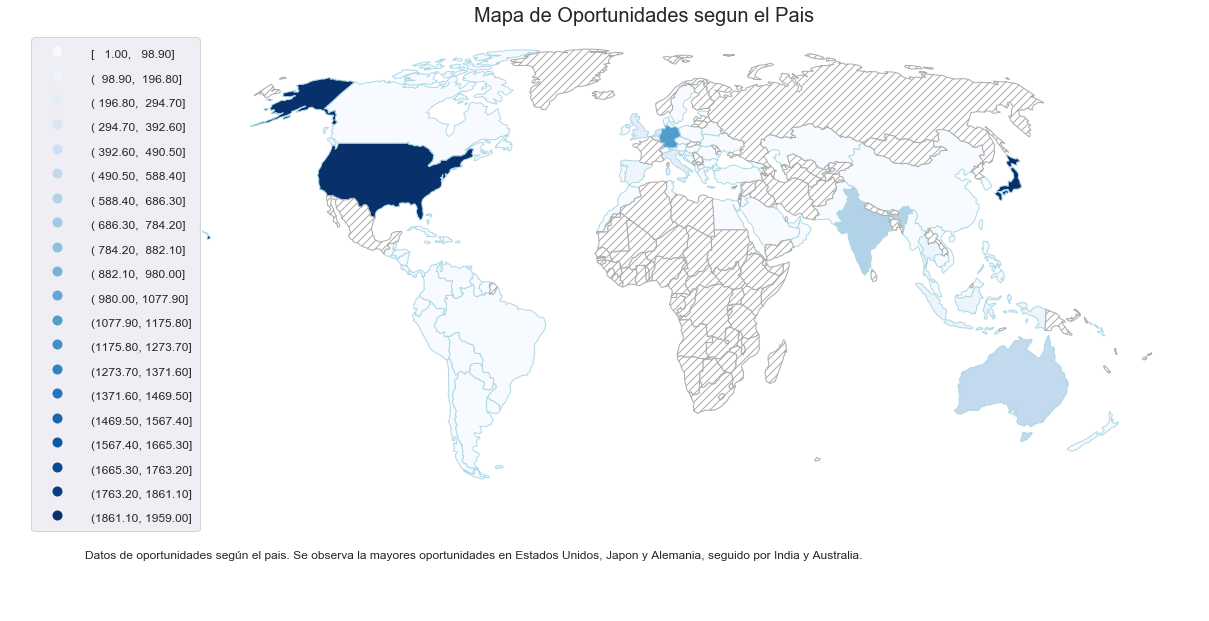

In [179]:
paisesConOportunidades = world_oportunity.dropna(subset=['Total_oportunity'])
paisesSinOportunidades = world_oportunity[world_oportunity['Total_oportunity'].isna()] 

ax = paisesConOportunidades.plot(column='Total_oportunity', cmap='Blues', figsize=(20, 12), k=20, legend=True, edgecolor='lightblue',scheme='EqualInterval')
paisesSinOportunidades.plot(ax=ax, color='#ffffff', hatch='///', edgecolor='#aaaaaa')

ax.set_title('Mapa de Oportunidades segun el Pais', fontdict={'fontsize': 20}, loc='center')
description = '''
Datos de oportunidades según el pais. Se observa la mayores oportunidades en Estados Unidos, Japon y Alemania, seguido por India y Australia. \n
'''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
legend = ax.get_legend()

legend.set_bbox_to_anchor((.11, 1))
legend.prop.set_size(12)

Segunda alternativa

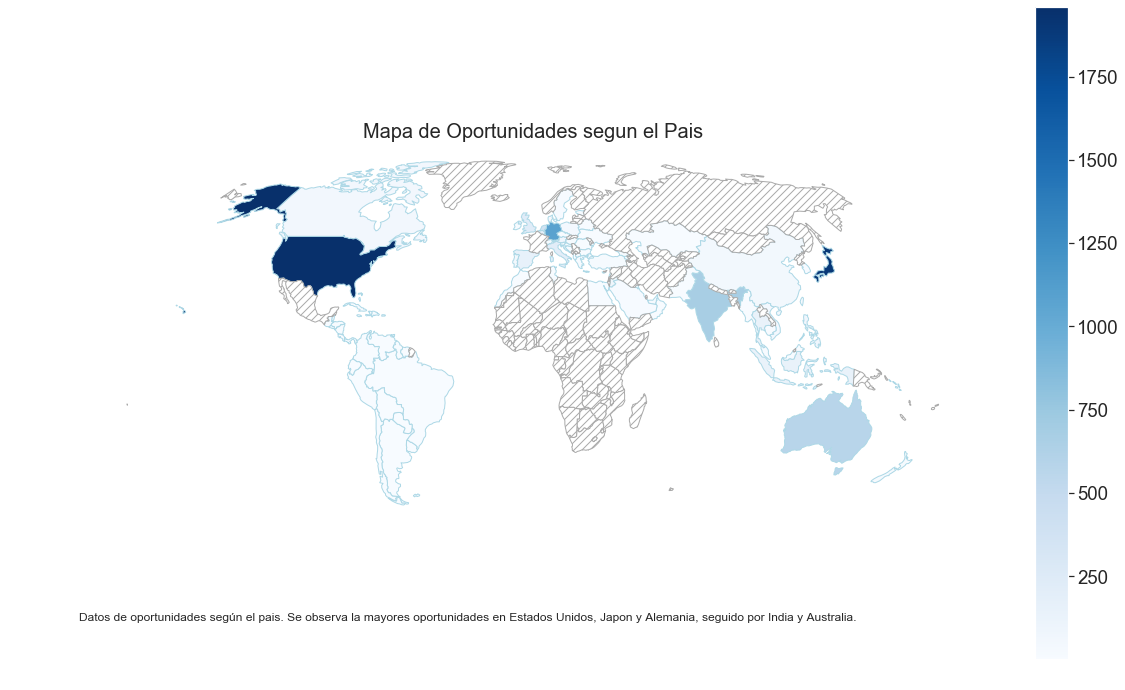

In [180]:
ax = paisesConOportunidades.plot(column='Total_oportunity', cmap='Blues', figsize=(20, 12), legend=True, edgecolor='lightblue')
paisesSinOportunidades.plot(ax=ax, color='#ffffff', hatch='///', edgecolor='#aaaaaa')

ax.set_title('Mapa de Oportunidades segun el Pais', fontdict={'fontsize': 20}, loc='center')
description = '''
Datos de oportunidades según el pais. Se observa la mayores oportunidades en Estados Unidos, Japon y Alemania, seguido por India y Australia. \n
'''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()


In [181]:
df_train_oportunity.groupby('Opportunity_Name')['Total'].count()

Opportunity_Name
Opportunity_Name_0        1
Opportunity_Name_1        1
Opportunity_Name_100      1
Opportunity_Name_1000     1
Opportunity_Name_10000    1
Opportunity_Name_10001    1
Opportunity_Name_10002    1
Opportunity_Name_10003    1
Opportunity_Name_10005    1
Opportunity_Name_10008    1
Opportunity_Name_10009    1
Opportunity_Name_10010    1
Opportunity_Name_10011    1
Opportunity_Name_10015    1
Opportunity_Name_10017    1
Opportunity_Name_10018    1
Opportunity_Name_10020    1
Opportunity_Name_10021    1
Opportunity_Name_10022    1
Opportunity_Name_10023    1
Opportunity_Name_10024    1
Opportunity_Name_10025    1
Opportunity_Name_10026    1
Opportunity_Name_10027    1
Opportunity_Name_10028    1
Opportunity_Name_1003     1
Opportunity_Name_10035    1
Opportunity_Name_10038    1
Opportunity_Name_1004     1
Opportunity_Name_10040    1
                         ..
Opportunity_Name_9968     1
Opportunity_Name_9969     1
Opportunity_Name_9970     1
Opportunity_Name_9971     1
Opp

In [182]:
Sudamerica = list(world_oportunity.loc[(world_oportunity.continent=='South America')].iso_a3)
df_train_oportunity[df_train_oportunity.iso_a3.isin(Sudamerica)]

Opportunity_Name iso_a3  Total
1273   Opportunity_Name_3649    URY      1
2117   Opportunity_Name_9060    PER      1
2118   Opportunity_Name_9060    COL      1
3673    Opportunity_Name_773    BOL      1
3681    Opportunity_Name_774    VEN      1
3682    Opportunity_Name_774    ECU      1
4067  Opportunity_Name_12621    CHL      1
5002   Opportunity_Name_1235    BRA      1
5579  Opportunity_Name_10379    ARG      1

In [183]:
Carribean = ["Cuba","Trinidad and Tobago", "Haiti",'Jamaica',"Puerto Rico", "Dominican Rep.", "Bahamas"]
caribe = world.loc[(world.name.isin(Carribean))].iso_a3

df_train_oportunity[df_train_oportunity.iso_a3.isin(list(caribe))].sort_values(by='Opportunity_Name')

Opportunity_Name iso_a3  Total
6757   Opportunity_Name_1062    HTI      1
5313  Opportunity_Name_11285    BHS      1
5292  Opportunity_Name_11286    CUB      1
5240    Opportunity_Name_121    PRI      1
3990   Opportunity_Name_1478    CUB      1
3920   Opportunity_Name_1500    BHS      1
3929   Opportunity_Name_1501    CUB      1
3934   Opportunity_Name_1539    JAM      1
6410   Opportunity_Name_2234    HTI      1
6740     Opportunity_Name_25    DOM      1
5726    Opportunity_Name_284    JAM      1
5727    Opportunity_Name_284    DOM      1
5724    Opportunity_Name_284    PRI      1
1903    Opportunity_Name_364    PRI      1
1268    Opportunity_Name_366    DOM      1
1261    Opportunity_Name_367    BHS      1
1373    Opportunity_Name_390    TTO      1
1120    Opportunity_Name_450    TTO      1
1533   Opportunity_Name_5048    TTO      1
1662   Opportunity_Name_5211    TTO      1
3063   Opportunity_Name_7492    DOM      1
2976   Opportunity_Name_7493    JAM      1
3061   Opportunity_Name_7494    HTI      1
3060   Opportunity_Name_7495    CUB      1
3540    Opportunity_Name_816    HTI      1
2752   Opportunity_Name_9458    CUB      1
2474   Opportunity_Name_9683    BHS      1
2608   Opportunity_Name_9897    PRI      1
2607   Opportunity_Name_9898    JAM      1

# Oportunidades

## Oportunidades agrupadas por Territorio

In [184]:
grouped_Oportunidades_x_Region = df_train.groupby(['Opportunity_Name','Territory'])['Total'].count().reset_index()
grouped_Oportunidades_x_Region

Opportunity_Name   Territory  Total
0         Opportunity_Name_0  NW America      7
1         Opportunity_Name_1  NW America      7
2       Opportunity_Name_100     Germany      1
3      Opportunity_Name_1000       Japan      1
4     Opportunity_Name_10000   Indonesia      1
5     Opportunity_Name_10001   Indonesia      1
6     Opportunity_Name_10002       India      1
7     Opportunity_Name_10003       India      1
8     Opportunity_Name_10005       India      1
9     Opportunity_Name_10008       India      1
10    Opportunity_Name_10009       India      1
11    Opportunity_Name_10010       India      1
12    Opportunity_Name_10011       India      1
13    Opportunity_Name_10015       India      1
14    Opportunity_Name_10017       India      1
15    Opportunity_Name_10018       India      1
16    Opportunity_Name_10020       India      1
17    Opportunity_Name_10021       India      1
18    Opportunity_Name_10022     Germany      1
19    Opportunity_Name_10023  SE America      1
20    Opportunity_Name_10024     Germany      1
21    Opportunity_Name_10025    Thailand      1
22    Opportunity_Name_10026       Spain      1
23    Opportunity_Name_10027     Germany      1
24    Opportunity_Name_10028     Germany      1
25     Opportunity_Name_1003    Thailand      1
26    Opportunity_Name_10035     Austria      4
27    Opportunity_Name_10038   Indonesia      1
28     Opportunity_Name_1004       India      1
29    Opportunity_Name_10040     Germany      1
...                      ...         ...    ...
8486   Opportunity_Name_9968       India      1
8487   Opportunity_Name_9969       India      1
8488   Opportunity_Name_9970       India      1
8489   Opportunity_Name_9971       India      1
8490   Opportunity_Name_9972       India      2
8491   Opportunity_Name_9973       India      1
8492   Opportunity_Name_9974       India      1
8493   Opportunity_Name_9975       India      1
8494   Opportunity_Name_9976       India     13
8495   Opportunity_Name_9977       India      1
8496   Opportunity_Name_9978       India      1
8497   Opportunity_Name_9979       India      1
8498    Opportunity_Name_998      Canada      2
8499   Opportunity_Name_9980       India      2
8500   Opportunity_Name_9981       India      1
8501   Opportunity_Name_9982       India      1
8502   Opportunity_Name_9983       India      1
8503   Opportunity_Name_9984       India      1
8504   Opportunity_Name_9985       India      1
8505   Opportunity_Name_9986       India      1
8506   Opportunity_Name_9987       India      1
8507   Opportunity_Name_9988       India      1
8508   Opportunity_Name_9989       India      2
8509    Opportunity_Name_999  Central US      1
8510   Opportunity_Name_9990       India      2
8511   Opportunity_Name_9991       India      1
8512   Opportunity_Name_9992  NE America      1
8513   Opportunity_Name_9995  NW America      1
8514   Opportunity_Name_9996     Germany      1
8515   Opportunity_Name_9997   Australia      1

[8516 rows x 3 columns]

In [185]:
#grouped_Oportunidades_x_Region = df_train.groupby(['Opportunity_Name','Territory'])['Territory'].count()
#grouped_Oportunidades_x_Region = grouped_Oportunidades_x_Region.rename(columns={"Territory": "total"}).to_frame()

grouped_Oportunidades_x_Region.sort_values(by=['Territory','Opportunity_Name'])

Opportunity_Name  Territory  Total
2845   Opportunity_Name_2274    Albania      1
7892   Opportunity_Name_9129    Albania      1
4214   Opportunity_Name_4187    Armenia      2
59    Opportunity_Name_10112  Australia      4
60    Opportunity_Name_10113  Australia      2
61    Opportunity_Name_10114  Australia      4
62    Opportunity_Name_10115  Australia      1
63    Opportunity_Name_10116  Australia      1
64    Opportunity_Name_10117  Australia      1
65    Opportunity_Name_10118  Australia      1
66    Opportunity_Name_10119  Australia      1
68    Opportunity_Name_10120  Australia      1
69    Opportunity_Name_10121  Australia      5
70    Opportunity_Name_10122  Australia      5
71    Opportunity_Name_10123  Australia      1
72    Opportunity_Name_10124  Australia      1
73    Opportunity_Name_10125  Australia      3
74    Opportunity_Name_10126  Australia      2
75    Opportunity_Name_10127  Australia      3
76    Opportunity_Name_10129  Australia      2
78    Opportunity_Name_10130  Australia     10
79    Opportunity_Name_10131  Australia     16
80    Opportunity_Name_10132  Australia      8
81    Opportunity_Name_10133  Australia      2
82    Opportunity_Name_10134  Australia      3
83    Opportunity_Name_10135  Australia      2
84    Opportunity_Name_10136  Australia     14
85    Opportunity_Name_10137  Australia      1
86    Opportunity_Name_10138  Australia      8
87    Opportunity_Name_10139  Australia      5
...                      ...        ...    ...
1399  Opportunity_Name_11881    Vietnam      1
1400  Opportunity_Name_11882    Vietnam      1
1401  Opportunity_Name_11883    Vietnam      1
1402  Opportunity_Name_11884    Vietnam      1
1404  Opportunity_Name_11886    Vietnam      1
1555  Opportunity_Name_12089    Vietnam      1
1557  Opportunity_Name_12090    Vietnam      1
1558  Opportunity_Name_12094    Vietnam      1
1559  Opportunity_Name_12095    Vietnam      1
1560  Opportunity_Name_12097    Vietnam      1
2054   Opportunity_Name_1315    Vietnam      1
2134   Opportunity_Name_1408    Vietnam      1
3649   Opportunity_Name_3394    Vietnam      1
3652   Opportunity_Name_3399    Vietnam      2
3657   Opportunity_Name_3410    Vietnam      2
3660   Opportunity_Name_3416    Vietnam      1
3661   Opportunity_Name_3417    Vietnam      1
3665   Opportunity_Name_3430    Vietnam      1
3976   Opportunity_Name_3890    Vietnam      1
4172   Opportunity_Name_4130    Vietnam      1
4173   Opportunity_Name_4131    Vietnam      1
4243   Opportunity_Name_4255    Vietnam      1
4244   Opportunity_Name_4256    Vietnam      1
5038   Opportunity_Name_5311    Vietnam      1
5070   Opportunity_Name_5351    Vietnam      1
6049    Opportunity_Name_662    Vietnam      3
6076   Opportunity_Name_6658    Vietnam      1
7487    Opportunity_Name_853    Vietnam      1
7514   Opportunity_Name_8584    Vietnam      2
8323   Opportunity_Name_9741    Vietnam      1

[8516 rows x 3 columns]

In [186]:
grouped_Oportunidades_x_Region.nlargest(20,'Total')

Opportunity_Name    Territory  Total
4827   Opportunity_Name_5036   NW America     36
1081  Opportunity_Name_11461   NW America     26
1619  Opportunity_Name_12179        India     26
6217   Opportunity_Name_6835   SW America     24
2333   Opportunity_Name_1661   SW America     18
79    Opportunity_Name_10131    Australia     16
689   Opportunity_Name_10944    Australia     16
690   Opportunity_Name_10945    Australia     16
691   Opportunity_Name_10946    Australia     16
4728   Opportunity_Name_4889   SE America     16
8238   Opportunity_Name_9628  China (PRC)     16
84    Opportunity_Name_10136    Australia     14
672   Opportunity_Name_10928    Australia     14
7423    Opportunity_Name_847   NW America     14
336   Opportunity_Name_10434    Australia     13
673   Opportunity_Name_10929    Australia     13
7169    Opportunity_Name_809   Central US     13
8494   Opportunity_Name_9976        India     13
2918   Opportunity_Name_2380   NE America     12
4633   Opportunity_Name_4769    Australia     12

In [187]:
grouped_Oportunidades_x_Region = grouped_Oportunidades_x_Region.set_index('Opportunity_Name')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4519093630>]],
      dtype=object)

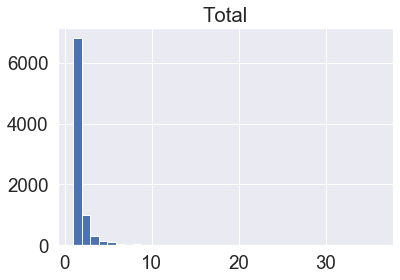

In [188]:
grouped_Oportunidades_x_Region.hist(bins=36)

In [189]:
heatmap_Oport_x_Reg = grouped_Oportunidades_x_Region.reset_index()\
                    .pivot("Opportunity_Name", "Territory", "Total").fillna(0)


In [190]:
heatmap_Oport_x_Reg

Territory               Albania  Armenia  Australia  Austria  Belarus  \
Opportunity_Name                                                        
Opportunity_Name_0          0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_1          0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_100        0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_1000       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10000      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10001      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10002      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10003      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10005      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10008      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10009      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10010      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10011      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10015      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10017      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10018      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10020      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10021      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10022      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10023      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10024      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10025      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10026      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10027      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10028      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_1003       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10035      0.0      0.0        0.0      4.0      0.0   
Opportunity_Name_10038      0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_1004       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_10040      0.0      0.0        0.0      0.0      0.0   
...                         ...      ...        ...      ...      ...   
Opportunity_Name_9968       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9969       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9970       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9971       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9972       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9973       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9974       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9975       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9976       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9977       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9978       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9979       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_998        0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9980       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9981       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9982       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9983       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9984       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9985       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9986       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9987       0.0      0.0        0.0      0.0      0.0   
Opportunity_Name_9988       0.0      0.0        0.0      0

In [191]:
heatmap_Oport_x_Reg.describe()

Territory      Albania      Armenia    Australia      Austria      Belarus  \
count      8516.000000  8516.000000  8516.000000  8516.000000  8516.000000   
mean          0.000235     0.000235     0.141733     0.017027     0.000470   
std           0.015324     0.021673     0.829571     0.210285     0.026541   
min           0.000000     0.000000     0.000000     0.000000     0.000000   
25%           0.000000     0.000000     0.000000     0.000000     0.000000   
50%           0.000000     0.000000     0.000000     0.000000     0.000000   
75%           0.000000     0.000000     0.000000     0.000000     0.000000   
max           1.000000     2.000000    16.000000     5.000000     2.000000   

Territory      Belgium  Bosnia & Herzegovina     Bulgaria        Burma  \
count      8516.000000           8516.000000  8516.000000  8516.000000   
mean          0.033466              0.000470     0.000587     0.000117   
std           0.272752              0.034266     0.024225     0.010836   
min           0.000000              0.000000     0.000000     0.000000   
25%           0.000000              0.000000     0.000000     0.000000   
50%           0.000000              0.000000     0.000000     0.000000   
75%           0.000000              0.000000     0.000000     0.000000   
max           9.000000              3.000000     1.000000     1.000000   

Territory     Cambodia  ...  Switzerland       Taiwan     Thailand  \
count      8516.000000  ...  8516.000000  8516.000000  8516.000000   
mean          0.000470  ...     0.002466     0.003875     0.019962   
std           0.021669  ...     0.056256     0.077294     0.168795   
min           0.000000  ...     0.000000     0.000000     0.000000   
25%           0.000000  ...     0.000000     0.000000     0.000000   
50%           0.000000  ...     0.000000     0.000000     0.000000   
75%           0.000000  ...     0.000000     0.000000     0.000000   
max           1.000000  ...     2.000000     4.000000     6.000000   

Territory      Tunisia       Turkey  UAE (Dubai)  UAE (Others)      Ukraine  \
count      8516.000000  8516.000000  8516.000000   8516.000000  8516.000000   
mean          0.000587     0.003405     0.003640      0.000235     0.000587   
std           0.024225     0.084571     0.060228      0.015324     0.028666   
min           0.000000     0.000000     0.000000      0.000000     0.000000   
25%           0.000000     0.000000     0.000000      0.000000     0.000000   
50%           0.000000     0.000000     0.000000      0.000000     0.000000   
75%           0.000000     0.000000     0.000000      0.000000     0.000000   
max           1.000000     4.000000     1.000000      1.000000     2.000000   

Territory  United Kingdom      Vietnam  
count         8516.000000  8516.000000  
mean             0.036754     0.005989  
std              0.264452     0.094905  
min              0.000000     0.000000  
25%              0.000000     0.000000  
50%              0.000000     0.000000  
75%              0.000000     0.000000  
max              8.000000     3.000000  

[8 rows x 70 columns]

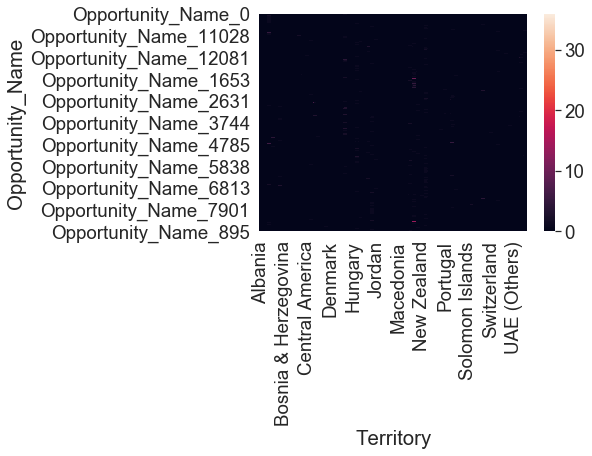

In [192]:
sns.heatmap(heatmap_Oport_x_Reg)

In [193]:
#fig, ax = plt.subplots(figsize=(14,16))        
#sns.heatmap(heatmap_Oport_x_Reg, annot=False, linewidths=.9010, ax=ax, cmap="YlGnBu"); 

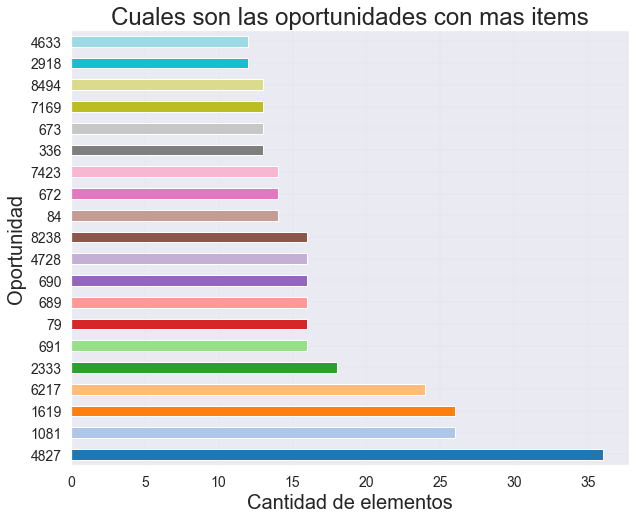

In [213]:
grouped_Oportunidades_x_Region_top20 = grouped_Oportunidades_x_Region['Total'].nlargest(20)

paired_colors = plt.cm.tab20(range(len(grouped_Oportunidades_x_Region_top20)))

grouped_Oportunidades_x_Region_top20.sort_values(ascending=False).plot(kind='barh', rot=0, figsize=(10,8), color=paired_colors, fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.1, alpha=0.3)
plt.title('Cuales son las oportunidades con mas items', fontsize=24);
plt.xlabel('Cantidad de elementos', fontsize=20);

plt.ylabel('Oportunidad', fontsize=20);

### Verifico si existe alguna Oportunidad asociada a 2 territorios

In [195]:
grouped_Oportunidades_x_Region = grouped_Oportunidades_x_Region.reset_index()
grouped_OP = grouped_Oportunidades_x_Region['Opportunity_Name'].to_frame()
grouped_OP.loc[:,'Total']=1

In [196]:
grouped_OP.groupby('Opportunity_Name')['Total'].count().unique()

array([1])

El unico valor posible es 1. Todos los datos estan correctos

In [197]:
df_train.head(10)

ID    Region   Territory  Pricing, Delivery_Terms_Quote_Appr  \
0  27446.0  Americas  NW America                                 0.0   
1  16808.0  Americas  NW America                                 1.0   
2  16805.0  Americas  NW America                                 1.0   
3  16802.0  Americas  NW America                                 1.0   
4  16799.0  Americas  NW America                                 1.0   
5  27455.0  Americas  NW America                                 1.0   
6  19342.0  Americas  NW America                                 0.0   
7   5581.0  Americas  NE America                                 1.0   
8  19372.0  Americas  NW America                                 1.0   
9  19375.0  Americas  NW America                                 1.0   

   Pricing, Delivery_Terms_Approved  Bureaucratic_Code_0_Approval  \
0                               0.0                           0.0   
1                               0.0                           1.0   
2                               0.0                           1.0   
3                               0.0                           1.0   
4                               0.0                           1.0   
5                               1.0                           1.0   
6                               0.0                           0.0   
7                               1.0                           1.0   
8                               0.0                           1.0   
9                               0.0                           1.0   

   Bureaucratic_Code_0_Approved  Submitted_for_Approval    Bureaucratic_Code  \
0                           0.0                     0.0  Bureaucratic_Code_4   
1                           0.0                     0.0  Bureaucratic_Code_5   
2                           0.0                     0.0  Bureaucratic_Code_5   
3                           0.0                     0.0  Bureaucratic_Code_5   
4                           0.0                     0.0  Bureaucratic_Code_5   
5                           1.0                     0.0  Bureaucratic_Code_4   
6                           0.0                     0.0  Bureaucratic_Code_4   
7                           1.0                     0.0  Bureaucratic_Code_4   
8                           0.0                     0.0  Bureaucratic_Code_5   
9                           0.0                     0.0  Bureaucratic_Code_5   

  Account_Created_Date  ... Territory_unified Region_unified iso3    pop_est  \
0            4/21/2015  ...     United States       Americas  USA  326625791   
1            7/27/2013  ...     United States       Americas  USA  326625791   
2            7/27/2013  ...     United States       Americas  USA  326625791   
3            7/27/2013  ...     United States       Americas  USA  326625791   
4            7/27/2013  ...     United States       Americas  USA  326625791   
5            4/21/2015  ...     United States       Americas  USA  326625791   
6            8/22/2013  ...     United States       Americas  USA  326625791   
7           12/18/2015  ...     United States       Americas  USA  326625791   
8            8/22/2013  ...     United States       Americas  USA  326625791   
9            8/22/2013  ...     United States       Americas  USA  326625791   

       continent                      name iso_a3  gdp_md_est  \
0  North America  United States of America    USA  18560000.0   
1  North America  United States of America    USA  18560000.0   
2  North America  United States of America    USA  18560000.0   
3  North America  United States of America    USA  18560000.0   
4  North America  United States of America    USA  18560000.0   
5  North America  United States of America    USA  18560000.0   
6  North America  United States of America    USA  18560000.0   
7  North America  United States of America    USA  18560000.0   
8  North America  United States of America    USA  18560000.0   
9  North America  United States of America 

In [198]:
dfPivot = df_train.pivot_table(index='Territory', columns='Product_Type', values='Total')
dfPivot = dfPivot.fillna(0)
dfPivot



Product_Type                 None   Other  Product_Type_0  Product_Type_1  \
Territory                                                                   
Albania                  2.000000     0.0             0.0             0.0   
Armenia                  2.000000     0.0             0.0             0.0   
Australia             1207.000000  1207.0          1207.0          1207.0   
Austria                145.000000   145.0             0.0             0.0   
Belarus                  4.000000     0.0             0.0             0.0   
Belgium                285.000000   285.0             0.0           285.0   
Bosnia & Herzegovina     4.000000     0.0             0.0             0.0   
Bulgaria                 5.000000     0.0             0.0             0.0   
Burma                    0.000000     0.0             0.0             0.0   
Cambodia                 4.000000     0.0             0.0             0.0   
Canada                  71.000000     0.0            71.0            71.0   
Carribean                4.172414     0.0             0.0             0.0   
Central America          1.250000     0.0             0.0             0.0   
Central US            2903.000000  2903.0          2903.0             0.0   
China (PRC)            218.000000     0.0             0.0             0.0   
Croatia                  1.000000     0.0             0.0             0.0   
Cyprus                  44.000000     0.0             0.0             0.0   
Czech Republic           1.000000     0.0             0.0             0.0   
Denmark                 38.000000    38.0             0.0             0.0   
Egypt                    1.000000     0.0             0.0             0.0   
Estonia                  8.000000     0.0             0.0             0.0   
Georgia                  1.000000     0.0             0.0             0.0   
Germany               1682.000000  1682.0          1682.0          1682.0   
Greece                   9.000000     0.0             0.0             0.0   
Hungary                 28.000000    28.0             0.0             0.0   
India                  809.000000     0.0             0.0           809.0   
Indonesia              145.000000   145.0             0.0             0.0   
Ireland                  9.000000     9.0             0.0             0.0   
Italy                  283.000000   283.0           283.0           283.0   
Japan                 2143.000000  2143.0          2143.0          2143.0   
...                           ...     ...             ...             ...   
NW America            2903.000000  2903.0          2903.0          2903.0   
Netherlands            533.000000   533.0           533.0           533.0   
New Zealand             38.000000     0.0            38.0             0.0   
None                  2143.000000  2143.0          2143.0          2143.0   
Oman                     4.000000     0.0             0.0             0.0   
Pakistan                 6.000000     0.0             0.0             0.0   
Philippines             95.000000    95.0             0.0             0.0   
Poland                  60.000000    60.0             0.0             0.0   
Portugal                65.000000    65.0             0.0             0.0   
Romania                  2.000000     0.0             0.0             0.0   
SE America            2903.000000  2903.0          2903.0          2903.0   
SW America            2903.000000  2903.0          2903.0             0.0   
Saudi Arabia            19.000000     0.0             0.0             0.0   
Slovenia                 1.000000     0.0             0.0             0.0   
Solomon Islands          1.000000     0.0             0.0             0.0   
South America            1.000000     0.0             0.0             0.0   
South East Asia          3.000000     0.0             0.0             0.0   
South Korea             15.000000     0.0             0.0             0.0   
Spain                  268.000000   268.0             0.0             0.0

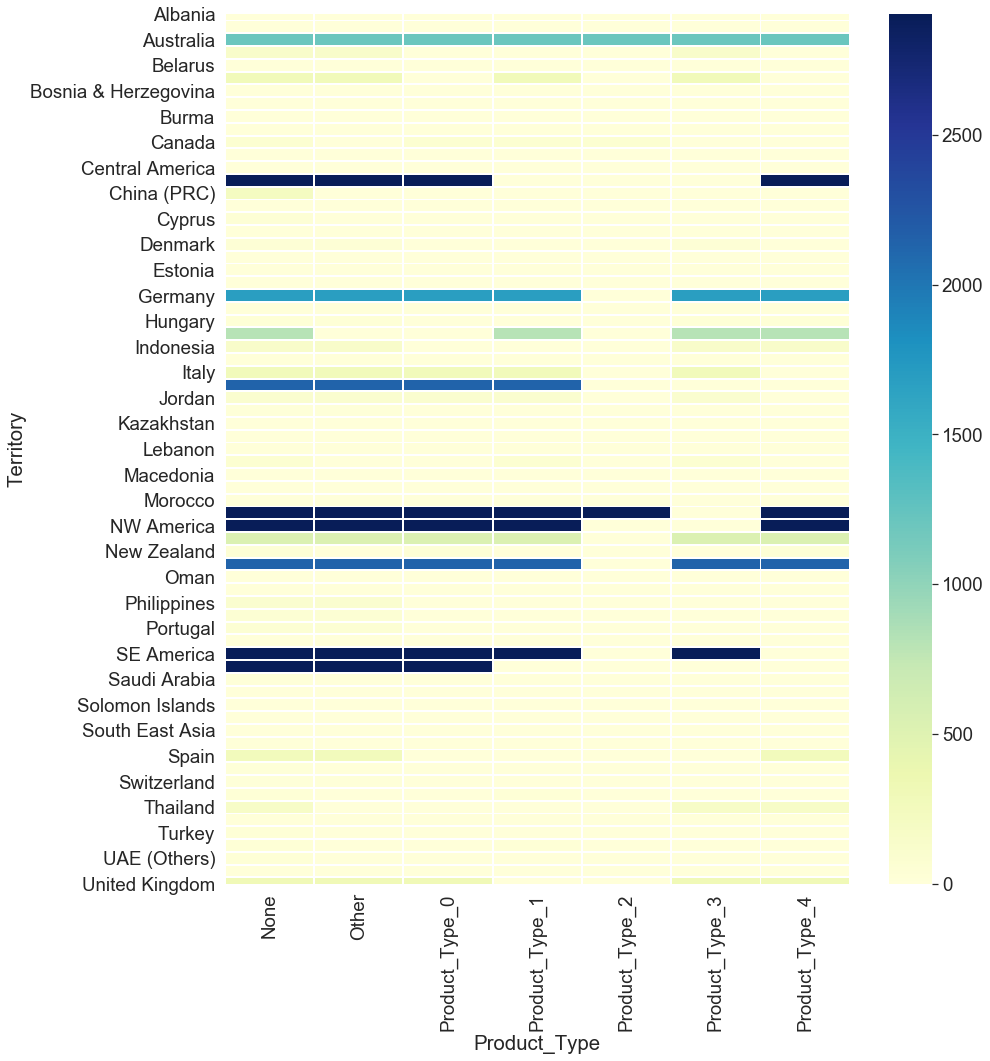

In [199]:
fig, ax = plt.subplots(figsize=(14,16))        
sns.heatmap(dfPivot, annot=False, linewidths=.9010, ax=ax, cmap="YlGnBu"); 

### Top20 de Oportunidades por Pais

In [200]:
df_train_Oportunity_x_Territory = df_train.groupby(['Opportunity_Name','Territory_unified'])['Total'].count().to_frame().sort_values('Total')

In [201]:
df_train_Oportunity_x_Territory = df_train_Oportunity_x_Territory.reset_index()

In [202]:
df_train_Oportunity_x_Territory

Opportunity_Name Territory_unified  Total
0      Opportunity_Name_4268             Japan      1
1      Opportunity_Name_5897             Japan      1
2      Opportunity_Name_5894             India      1
3      Opportunity_Name_5893           Germany      1
4      Opportunity_Name_5892             Japan      1
5      Opportunity_Name_5889             Japan      1
6      Opportunity_Name_5888     United States      1
7      Opportunity_Name_5887             Japan      1
8      Opportunity_Name_5886             Japan      1
9      Opportunity_Name_5885             Japan      1
10     Opportunity_Name_5884             Japan      1
11     Opportunity_Name_5883             Japan      1
12     Opportunity_Name_5882             Japan      1
13     Opportunity_Name_5881             Japan      1
14     Opportunity_Name_5880             Japan      1
15     Opportunity_Name_5879             Japan      1
16     Opportunity_Name_5878             Japan      1
17     Opportunity_Name_5877             Japan      1
18     Opportunity_Name_5876             Japan      1
19     Opportunity_Name_5873             Japan      1
20     Opportunity_Name_5872             Japan      1
21     Opportunity_Name_5871         Indonesia      1
22     Opportunity_Name_5866             India      1
23     Opportunity_Name_5865         Indonesia      1
24     Opportunity_Name_5862             Japan      1
25     Opportunity_Name_5860             Japan      1
26     Opportunity_Name_5898             Japan      1
27     Opportunity_Name_5899             Japan      1
28       Opportunity_Name_59     United States      1
29     Opportunity_Name_5900             Japan      1
...                      ...               ...    ...
8491  Opportunity_Name_10145         Australia     10
8492  Opportunity_Name_10130         Australia     10
8493   Opportunity_Name_4780         Australia     10
8494   Opportunity_Name_4779         Australia     10
8495   Opportunity_Name_4774         Australia     10
8496   Opportunity_Name_2905         Australia     10
8497  Opportunity_Name_10951         Australia     11
8498  Opportunity_Name_10653       Netherlands     11
8499   Opportunity_Name_4771         Australia     12
8500   Opportunity_Name_5331     United States     12
8501   Opportunity_Name_4769         Australia     12
8502   Opportunity_Name_2380     United States     12
8503   Opportunity_Name_9976             India     13
8504  Opportunity_Name_10434         Australia     13
8505  Opportunity_Name_10929         Australia     13
8506    Opportunity_Name_809     United States     13
8507  Opportunity_Name_10136         Australia     14
8508  Opportunity_Name_10928         Australia     14
8509    Opportunity_Name_847     United States     14
8510   Opportunity_Name_9628             China     16
8511  Opportunity_Name_10945         Australia     16
8512  Opportunity_Name_10946         Australia     16
8513   Opportunity_Name_4889     United States     16
8514  Opportunity_Name_10944         Australia     16
8515  Opportunity_Name_10131         Australia     16
8516   Opportunity_Name_1661     United States     18
8517   Opportunity_Name_6835     United States     24
8518  Opportunity_Name_11461     United States     26
8519  Opportunity_Name_12179             India     26
8520   Opportunity_Name_5036     United States     36

[8521 rows x 3 columns]

In [203]:
grouped_Territory_x_Oportunity = df_train_Oportunity_x_Territory['Territory_unified'].value_counts().reset_index()
grouped_Territory_x_Oportunity = grouped_Territory_x_Oportunity.rename(columns={"Territory_unified": "total","index":"Territory_unified"})



In [204]:
grouped_Territory_x_Oportunity[grouped_Territory_x_Oportunity.Territory_unified.str.match('None')]

Empty DataFrame
Columns: [Territory_unified, total]
Index: []

In [205]:
grouped_Territory_x_Oportunity[grouped_Territory_x_Oportunity.Territory_unified.isna()]

Empty DataFrame
Columns: [Territory_unified, total]
Index: []

In [206]:
grouped_Territory_x_Oportunity['total'].nlargest(20)

0     1959
1     1897
2     1080
3      680
4      578
5      384
6      228
7      208
8      179
9      160
10     146
11     140
12      82
13      77
14      72
15      61
16      52
17      49
18      44
19      43
Name: total, dtype: int64

In [207]:
grouped_Territory_x_Oportunity[grouped_Territory_x_Oportunity.Territory_unified.str.contains('N')==True]

Territory_unified  total
5        Netherlands    384
25       New Zealand     23
53   North Macedonia      3
73         Nicaragua      1

In [208]:
grouped_Territory_x_Oportunity.set_index('Territory_unified',inplace=True)

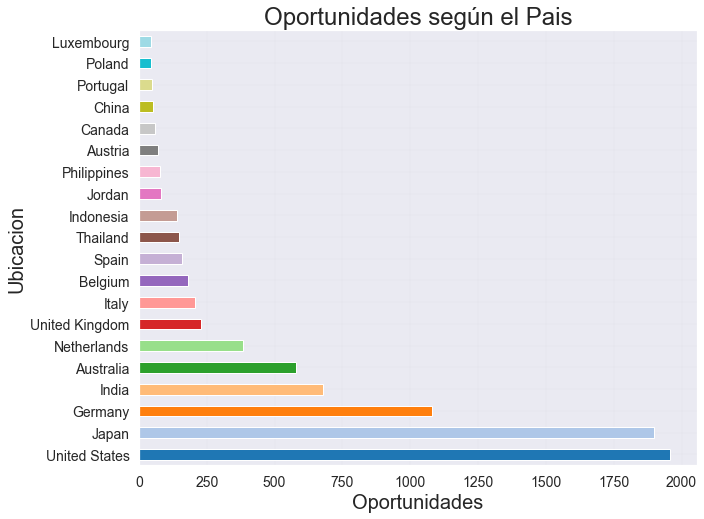

In [209]:
grouped_Territory_x_Oportunity_top20 = grouped_Territory_x_Oportunity['total'].nlargest(20)

paired_colors = plt.cm.tab20(range(len(grouped_Territory_x_Oportunity_top20)))

grouped_Territory_x_Oportunity_top20.sort_values(ascending=False).plot(kind='barh', rot=0, figsize=(10,8), color=paired_colors, fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.1, alpha=0.3)
plt.title('Oportunidades según el Pais', fontsize=24);
plt.xlabel('Oportunidades', fontsize=20);

plt.ylabel('Ubicacion', fontsize=20);